In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive

/content/drive/MyDrive


# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Data and Describing Data


In [4]:
# 1. Load Dataset
df_train = pd.read_csv('../../Data/train.csv')
df_train['Log_Price'] = np.log(df_train['Price'])

In [6]:
df_train['Log_Price'].mean(), df_train['Log_Price'].std()

(13.80687969810898, 0.9834000219767532)

In [5]:
df_train["Year"].mean(), df_train["Year"].std()

(2016.4195506982392, 3.3703274633057414)

In [ ]:
# 2. Check Infomation of the DS and Type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1582 non-null   object 
 12  Max Power           1582 non-null   object 
 13  Max Torque          1582 non-null   object 
 14  Drivetrain          1536 non-null   object 
 15  Length              1595 non-null   float64
 16  Width 

In [ ]:
# 3. Quick Review
df_train.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


In [ ]:
# 4. Descriptive Statistics
df_train.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.647000e+03,1647.000000,1.647000e+03,1595.00000,1595.000000,1595.000000,1595.000000,1557.000000
mean,1.696655e+06,2016.419551,5.420636e+04,4281.47837,1767.580564,1592.423824,5.310345,52.154656
std,2.360649e+06,3.370327,5.849584e+04,448.16458,137.053924,136.360967,0.816002,15.405199
min,4.900000e+04,1988.000000,0.000000e+00,3099.00000,1475.000000,1165.000000,2.000000,15.000000
25%,4.775000e+05,2014.000000,2.900000e+04,3985.00000,1695.000000,1485.000000,5.000000,40.000000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.00000,1775.000000,1550.000000,5.000000,50.000000
75%,1.950000e+06,2019.000000,7.200000e+04,4630.00000,1835.000000,1675.000000,5.000000,60.000000
max,2.750000e+07,2022.000000,2.000000e+06,5569.00000,2220.000000,1995.000000,8.000000,105.000000


# Exploratory Data Analysis On Numerical Columns

---



## Chuyển cột Seating Capacity thành int64 vì đây là cột cateforical[văn bản liên

In [ ]:
df_train["Seating Capacity"].unique()

array([nan,  5.,  7.,  2.,  6.,  8.,  4.])

In [ ]:
# Fill with mode value
df_train["Seating Capacity"].fillna(df_train["Seating Capacity"].mode()[0], inplace=True)

In [ ]:
# Convert dtype to int64
df_train["Seating Capacity"] = df_train["Seating Capacity"].astype("int64")

## Xem xét các cột object nhưng chứa dữ liệu float64

In [ ]:
for col in ['Engine', 'Max Power', 'Max Torque', 'Fuel Tank Capacity']:
    print(f"\nColumn: {col}")
    print(df_train[col].unique()[:20])


Column: Engine
[nan '1995 cc' '1997 cc' '2925 cc' '2755 cc' '1248 cc' '1950 cc' '2993 cc'
 '1498 cc' '1497 cc' '1396 cc' '1984 cc' '2179 cc' '1956 cc' '1461 cc'
 '1998 cc' '1582 cc' '1797 cc' '1968 cc' '998 cc']

Column: Max Power
[nan '184 bhp @ 4000 rpm' '138 bhp @ 3750 rpm' '326 bhp @ 3600 rpm'
 '174 bhp @ 3400 rpm' '89 bhp @ 4000 rpm' '74 bhp @ 4000 rpm'
 '192 bhp @ 3800 rpm' '244 bhp @ 4000 rpm' '99 bhp @ 3750 rpm'
 '117 bhp @ 6600 rpm' '165 bhp @ 3500 rpm' '138 bhp @ 4000 rpm'
 '169 bhp @ 3750 rpm' '188 bhp @ 3500 rpm' '84 bhp @ 3750 rpm'
 '248 bhp @ 5200 rpm' '126 bhp @ 4000 rpm' '147 bhp @ 6500 rpm'
 '188 bhp @ 4200 rpm']

Column: Max Torque
[nan '350 Nm @ 1750 rpm' '320 Nm @ 1600 rpm' '700 Nm @ 1200 rpm'
 '450 Nm @ 1600 rpm' '200 Nm @ 1750 rpm' '190 Nm @ 2000 rpm'
 '400 Nm @ 1600 rpm' '600 Nm @ 2000 rpm' '205 Nm @ 1750 rpm'
 '145 Nm @ 4600 rpm' '224 Nm @ 1500 rpm' '400 Nm @ 2750 rpm'
 '320 Nm @ 1700 rpm' '420 Nm @ 1750 rpm' '200 Nm @ 1900 rpm'
 '350 Nm @ 1450 rpm' '260 Nm @ 1

- Các cột `Engine`, `Max Power`, `Max Torque` chứa những thông tin quan trọng có dạng số thực

In [ ]:
# Split 'Max Power'
df_train[['Max_Power_Value', 'Max_Power_RPM']] = df_train['Max Power'].str.split('@', expand=True)
df_train['Max_Power_RPM'] = df_train['Max_Power_RPM'].str.strip().str.replace('rpm', '', regex=False)
df_train['Max_Power_Value'] = df_train['Max_Power_Value'].str.replace(r'[^\d.]+', '', regex=True)


# Split 'Max Torque'
df_train[['Max_Torque_Value', 'Max_Torque_RPM']] = df_train['Max Torque'].str.split('@', expand=True)
df_train['Max_Torque_RPM'] = df_train['Max_Torque_RPM'].str.strip().str.replace('rpm', '', regex=False)
df_train['Max_Torque_Value'] = df_train['Max_Torque_Value'].str.replace(r'[^\d.]+', '', regex=True)


# Convert to numeric, handling errors
for col in ['Max_Power_Value', 'Max_Torque_Value']:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

df_train['Engine_Value'] = df_train['Engine'].str.replace('cc', '').astype(float)
df_train['Engine_Value'] = pd.to_numeric(df_train['Engine'].str.replace('cc', ''), errors='coerce')

# Inspect the new columns
print(df_train[['Engine_Value', 'Max_Power_Value', 'Max_Power_RPM', 'Max_Torque_Value', 'Max_Torque_RPM']].info())
print(df_train[['Engine_Value', 'Max_Power_Value', 'Max_Power_RPM', 'Max_Torque_Value', 'Max_Torque_RPM']].head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine_Value      1582 non-null   float64
 1   Max_Power_Value   1582 non-null   float64
 2   Max_Power_RPM     1582 non-null   object 
 3   Max_Torque_Value  1582 non-null   float64
 4   Max_Torque_RPM    1582 non-null   object 
dtypes: float64(3), object(2)
memory usage: 64.5+ KB
None
    Engine_Value  Max_Power_Value Max_Power_RPM  Max_Torque_Value  \
0            NaN              NaN           NaN               NaN   
1         1995.0            184.0         4000              350.0   
2         1997.0            138.0         3750              320.0   
3         2925.0            326.0         3600              700.0   
4         2755.0            174.0         3400              450.0   
5         1248.0             89.0         4000              200.0   
6         1248.0        

In [ ]:
# Fill missing values with NaN
df_train['Max_Power_RPM'].fillna(np.nan, inplace=True)
df_train['Max_Torque_RPM'].fillna(np.nan, inplace=True)

# Convert to numeric, coercing errors to NaN
for col in ['Max_Power_RPM', 'Max_Torque_RPM']:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
print(df_train[['Engine_Value', 'Max_Power_Value', 'Max_Power_RPM', 'Max_Torque_Value', 'Max_Torque_RPM']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine_Value      1582 non-null   float64
 1   Max_Power_Value   1582 non-null   float64
 2   Max_Power_RPM     1578 non-null   float64
 3   Max_Torque_Value  1582 non-null   float64
 4   Max_Torque_RPM    1582 non-null   float64
dtypes: float64(5)
memory usage: 64.5 KB
None


In [ ]:
for col in ['Engine_Value', 'Max_Power_Value', 'Max_Torque_Value', 'Engine_Value']:
    median_value = df_train[col].median()
    df_train[col].fillna(median_value, inplace=True)
    print(f"Median of {col}: {median_value}")
    print(f"Filled NaN values in {col} with: {median_value}")

Median of Engine_Value: 1498.0
Filled NaN values in Engine_Value with: 1498.0
Median of Max_Power_Value: 117.0
Filled NaN values in Max_Power_Value with: 117.0
Median of Max_Torque_Value: 200.0
Filled NaN values in Max_Torque_Value with: 200.0
Median of Engine_Value: 1498.0
Filled NaN values in Engine_Value with: 1498.0


In [ ]:
for col in ['Max_Power_RPM', 'Max_Torque_RPM']:
    median_value = df_train[col].median()
    df_train[col].fillna(median_value, inplace=True)
    print(f"Median of {col}: {median_value}")
    print(f"Filled NaN values in {col} with: {median_value}")

Median of Max_Power_RPM: 4200.0
Filled NaN values in Max_Power_RPM with: 4200.0
Median of Max_Torque_RPM: 1900.0
Filled NaN values in Max_Torque_RPM with: 1900.0


In [ ]:
# Drop Engine Max_Power Max Torque columns
df_train.drop(['Engine', 'Max Power', 'Max Torque'], axis=1, inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Drivetrain          1536 non-null   object 
 12  Length              1595 non-null   float64
 13  Width               1595 non-null   float64
 14  Height              1595 non-null   float64
 15  Seating Capacity    1647 non-null   int64  
 16  Fuel T

## Tổng quan về các cột numerical

In [ ]:
# 1. Identify all numerical columns
numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()
print(f"\nIdentified {len(numerical_cols)} numerical columns.")
# print(f"Numerical columns: {numerical_cols}") # Optional: print all


Identified 11 numerical columns.



Found 7 numerical columns with missing values:
Length                52
Width                 52
Height                52
Fuel Tank Capacity    90
Max_Power_Value       65
Max_Torque_Value      65
Engine_Value          65
dtype: int64

--- Distribution Analysis for Numerical Columns with Missing Data ---

--- Analyzing Column: 'Length' ---
  Missing Values: 52 (3.16%)
  Skewness: -0.02
  Mean: 4281.48
  Median: 4370.00


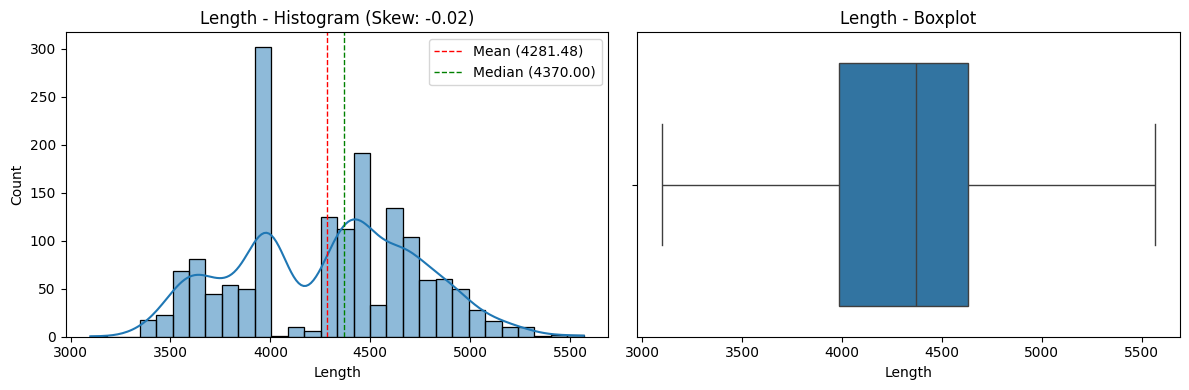


--- Analyzing Column: 'Width' ---
  Missing Values: 52 (3.16%)
  Skewness: 0.30
  Mean: 1767.58
  Median: 1775.00


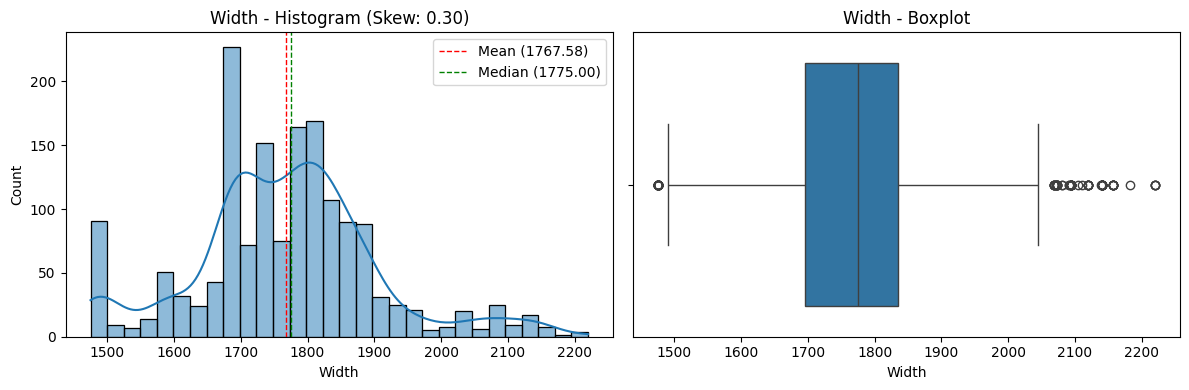


--- Analyzing Column: 'Height' ---
  Missing Values: 52 (3.16%)
  Skewness: 0.85
  Mean: 1592.42
  Median: 1550.00


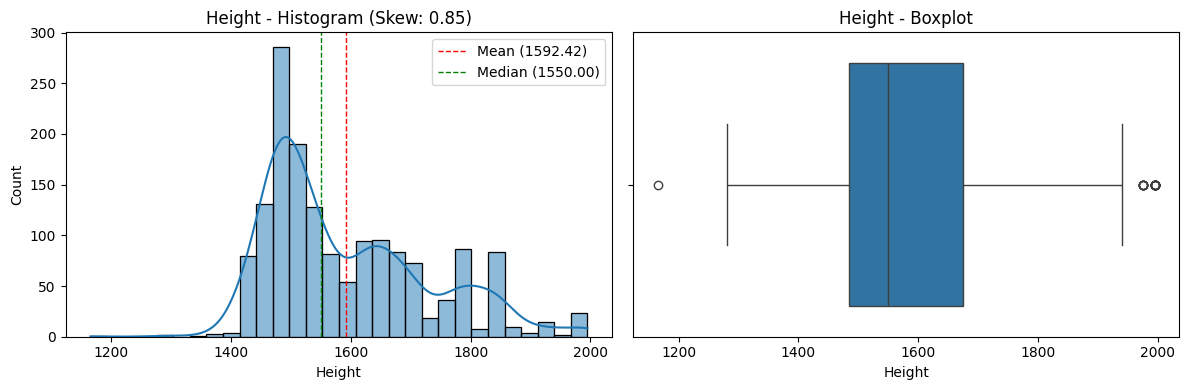


--- Analyzing Column: 'Fuel Tank Capacity' ---
  Missing Values: 90 (5.46%)
  Skewness: 0.82
  Mean: 52.15
  Median: 50.00


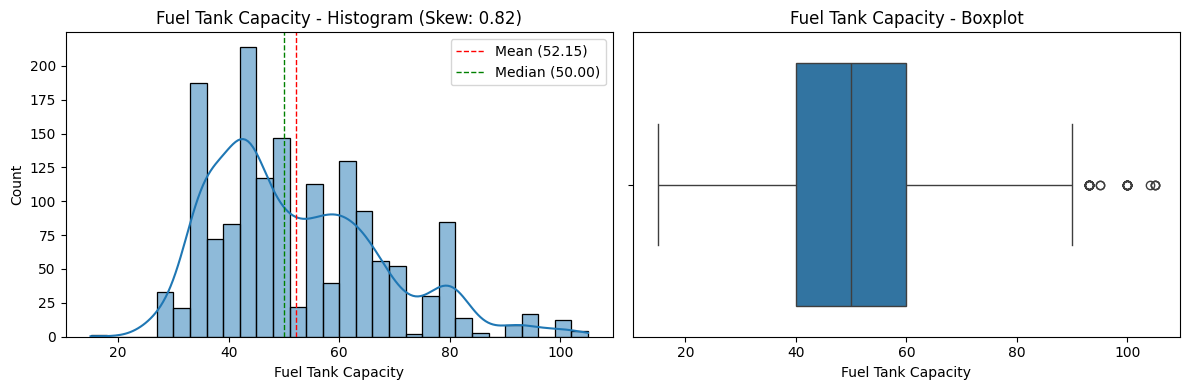


--- Analyzing Column: 'Max_Power_Value' ---
  Missing Values: 65 (3.95%)
  Skewness: 2.01
  Mean: 129.90
  Median: 117.00


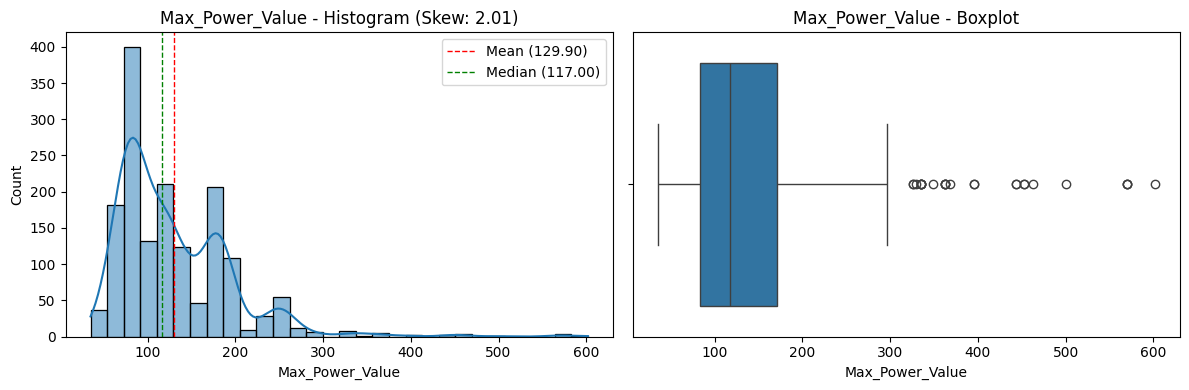


--- Analyzing Column: 'Max_Torque_Value' ---
  Missing Values: 65 (3.95%)
  Skewness: 0.89
  Mean: 246.48
  Median: 200.00


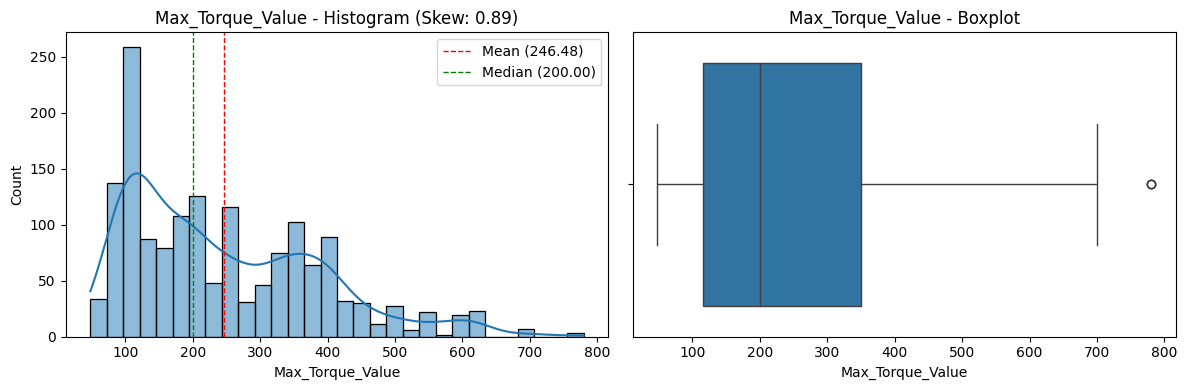


--- Analyzing Column: 'Engine_Value' ---
  Missing Values: 65 (3.95%)
  Skewness: 1.86
  Mean: 1701.67
  Median: 1498.00


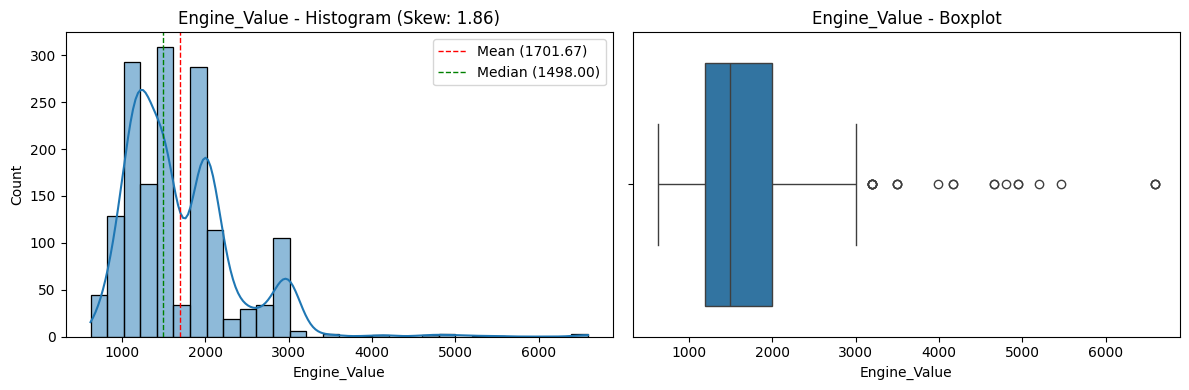

In [ ]:
# 2. Analyze Distribution of Affected Columns:
missing_info = df_train[numerical_cols].isnull().sum()
missing_numerical_cols = missing_info[missing_info > 0]

if missing_numerical_cols.empty:
    print("\nCongratulations! No missing values found in any numerical columns.")
else:
    print(f"\nFound {len(missing_numerical_cols)} numerical columns with missing values:")
    print(missing_numerical_cols)

    # 3. Analyze each column with missing values
    print("\n--- Distribution Analysis for Numerical Columns with Missing Data ---")
    for col in missing_numerical_cols.index:
        missing_count = missing_numerical_cols[col]
        total_count = len(df_train)
        missing_percentage = (missing_count / total_count) * 100
        skewness = df_train[col].skew()
        mean_val = df_train[col].mean()
        median_val = df_train[col].median()

        print(f"\n--- Analyzing Column: '{col}' ---")
        print(f"  Missing Values: {missing_count} ({missing_percentage:.2f}%)")
        print(f"  Skewness: {skewness:.2f}")
        print(f"  Mean: {mean_val:.2f}")
        print(f"  Median: {median_val:.2f}")

        # Plotting distribution
        plt.figure(figsize=(12, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_train[col], kde=True, bins=30)
        plt.title(f'{col} - Histogram (Skew: {skewness:.2f})')
        # Add vertical lines for mean and median
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean ({mean_val:.2f})')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median ({median_val:.2f})')
        plt.legend()


        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_train[col])
        plt.title(f'{col} - Boxplot')

        plt.tight_layout()
        plt.show()

## Xử lý cột Max_Torque_Value

Phân phối: Lệch phải (skewness = 0.89), phân phối bimodal \\
Missing values: Fill bằng median (200.00) vì ít bị ảnh hưởng bởi outliers \\
Xử lý outlier: Sử dụng cắt IQR (Winsorization) để đưa giá trị >700 về giới hạn trên

In [ ]:
print("--- Phân tích cột Max_Torque_Value trước khi xử lý ---")
print(f"Số lượng giá trị thiếu: {df_train['Max_Torque_Value'].isna().sum()} ({df_train['Max_Torque_Value'].isna().mean() * 100:.2f}%)")
print(f"Trung bình: {df_train['Max_Torque_Value'].mean():.2f}")
print(f"Trung vị: {df_train['Max_Torque_Value'].median():.2f}")
print(f"Độ lệch (skewness): {df_train['Max_Torque_Value'].skew():.2f}")

--- Phân tích cột Max_Torque_Value trước khi xử lý ---
Số lượng giá trị thiếu: 65 (3.95%)
Trung bình: 246.48
Trung vị: 200.00
Độ lệch (skewness): 0.89


In [ ]:
median_value = df_train['Max_Torque_Value'].median()
print(f"\nĐiền missing values bằng giá trị trung vị: {median_value:.2f}")


Điền missing values bằng giá trị trung vị: 200.00


In [ ]:
# Tạo một bản sao để giữ dữ liệu gốc
df_processed = df_train.copy()
df_processed['Max_Torque_Value'] = df_processed['Max_Torque_Value'].fillna(median_value)

In [ ]:
# XỬ LÝ OUTLIERS sử dụng IQR method
Q1 = df_processed['Max_Torque_Value'].quantile(0.25)
Q3 = df_processed['Max_Torque_Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nXử lý outliers:")
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")


Xử lý outliers:
Q1 (25%): 115.00
Q3 (75%): 343.00
IQR: 228.00
Lower bound: -227.00
Upper bound: 685.00


In [ ]:
# Đếm số lượng outliers
n_outliers_below = (df_processed['Max_Torque_Value'] < lower_bound).sum()
n_outliers_above = (df_processed['Max_Torque_Value'] > upper_bound).sum()
print(f"Số lượng outliers dưới lower bound: {n_outliers_below}")
print(f"Số lượng outliers trên upper bound: {n_outliers_above}")
print(f"Tổng số outliers: {n_outliers_below + n_outliers_above} ({(n_outliers_below + n_outliers_above) / len(df_processed) * 100:.2f}%)")

Số lượng outliers dưới lower bound: 0
Số lượng outliers trên upper bound: 10
Tổng số outliers: 10 (0.61%)


In [ ]:
df_processed['Max_Torque_Value_Winsorized'] = df_processed['Max_Torque_Value'].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
# SO SÁNH TRƯỚC VÀ SAU KHI XỬ LÝ
print("\n--- Thống kê sau khi xử lý ---")
print("Dữ liệu ban đầu (có missing, có outliers):")
print(df_train['Max_Torque_Value'].describe())

print("\nDữ liệu sau khi điền missing values:")
print(df_processed['Max_Torque_Value'].describe())

print("\nDữ liệu sau khi điền missing values và xử lý outliers (Winsorization):")
print(df_processed['Max_Torque_Value_Winsorized'].describe())

print("\nSo sánh độ lệch (skewness):")
print(f"Ban đầu: {df_train['Max_Torque_Value'].skew():.2f}")
print(f"Sau khi điền missing values: {df_processed['Max_Torque_Value'].skew():.2f}")
print(f"Sau khi xử lý outliers: {df_processed['Max_Torque_Value_Winsorized'].skew():.2f}")


--- Thống kê sau khi xử lý ---
Dữ liệu ban đầu (có missing, có outliers):
count    1582.000000
mean      246.475766
std       141.843687
min        48.000000
25%       115.000000
50%       200.000000
75%       350.000000
max       780.000000
Name: Max_Torque_Value, dtype: float64

Dữ liệu sau khi điền missing values:
count    1647.000000
mean      244.641567
std       139.309171
min        48.000000
25%       115.000000
50%       200.000000
75%       343.000000
max       780.000000
Name: Max_Torque_Value, dtype: float64

Dữ liệu sau khi điền missing values và xử lý outliers (Winsorization):
count    1647.000000
mean      244.411452
std       138.516872
min        48.000000
25%       115.000000
50%       200.000000
75%       343.000000
max       685.000000
Name: Max_Torque_Value_Winsorized, dtype: float64

So sánh độ lệch (skewness):
Ban đầu: 0.89
Sau khi điền missing values: 0.94
Sau khi xử lý outliers: 0.90


In [ ]:
df_train['Max_Torque_Value_Processed'] = df_processed['Max_Torque_Value_Winsorized']

In [ ]:
# Thay thế cột gốc bằng cột đã xử lý nếu cần

df_train['Max_Torque_Value'] = df_train['Max_Torque_Value_Processed']
df_train.drop(columns=['Max_Torque_Value_Processed'], inplace=True)

## Xử lý cột `Engine_Value`

Phân phối: Lệch phải đáng kể (skewness = 1.86), nhiều đỉnh (multimodal) \\
Missing values: Fill bằng median (1498.00), chênh lệch lớn với mean (1701.67) \\
Xử lý outlier: Log transformation trước, sau đó áp dụng IQR để xử lý outliers ở vùng >3000

In [ ]:
# Tạo copy để xử lý riêng
df = df_train.copy()
print("--- Phân tích cột Engine_Value trước khi xử lý ---")
print(f"Số lượng giá trị thiếu: {df_train['Engine_Value'].isna().sum()} ({df['Engine_Value'].isna().mean() * 100:.2f}%)")
print(f"Trung bình: {df['Engine_Value'].mean():.2f}")
print(f"Trung vị: {df['Engine_Value'].median():.2f}")
print(f"Độ lệch (skewness): {df['Engine_Value'].skew():.2f}")

# Mô tả thống kê cơ bản
print("\nThống kê mô tả:")
print(df['Engine_Value'].describe)

--- Phân tích cột Engine_Value trước khi xử lý ---
Số lượng giá trị thiếu: 65 (3.95%)
Trung bình: 1701.67
Trung vị: 1498.00
Độ lệch (skewness): 1.86

Thống kê mô tả:
<bound method NDFrame.describe of 0          NaN
1       1995.0
2       1997.0
3       2925.0
4       2755.0
         ...  
1642    1248.0
1643       NaN
1644     998.0
1645    1995.0
1646    1196.0
Name: Engine_Value, Length: 1647, dtype: float64>


In [ ]:
median_value = df['Engine_Value'].median()
print(f"\nĐiền missing values bằng giá trị trung vị: {median_value:.2f}")

# Tạo một bản sao để giữ dữ liệu gốc
df_processed = df.copy()
df_processed['Engine_Value'] = df_processed['Engine_Value'].fillna(median_value)


Điền missing values bằng giá trị trung vị: 1498.00


In [ ]:
min_value = df_processed['Engine_Value'].min()
print(f"\nGiá trị nhỏ nhất: {min_value:.2f}")

# Áp dụng log transformation (với dữ liệu này không cần shift vì không có giá trị âm/0)
df_processed['Engine_Value_Log'] = np.log(df_processed['Engine_Value'])


Giá trị nhỏ nhất: 624.00


In [ ]:
print("\nSo sánh độ lệch trước và sau khi áp dụng log transformation:")
print(f"Skewness ban đầu: {df_processed['Engine_Value'].skew():.2f}")
print(f"Skewness sau log: {df_processed['Engine_Value_Log'].skew():.2f}")


So sánh độ lệch trước và sau khi áp dụng log transformation:
Skewness ban đầu: 1.93
Skewness sau log: 0.44


In [ ]:
print(f"\nXử lý outliers trên dữ liệu đã log:")
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Đếm số lượng outliers
n_outliers_below = (df_processed['Engine_Value_Log'] < lower_bound).sum()
n_outliers_above = (df_processed['Engine_Value_Log'] > upper_bound).sum()
print(f"Số lượng outliers dưới lower bound: {n_outliers_below}")
print(f"Số lượng outliers trên upper bound: {n_outliers_above}")
print(f"Tổng số outliers: {n_outliers_below + n_outliers_above} ({(n_outliers_below + n_outliers_above) / len(df_processed) * 100:.2f}%)")

# Áp dụng Winsorization (cắt outliers về giới hạn)
df_processed['Engine_Value_Log_Winsorized'] = df_processed['Engine_Value_Log'].clip(lower=lower_bound, upper=upper_bound)

# Chuyển đổi ngược lại từ log để có giá trị gốc đã được xử lý
df_processed['Engine_Value_Processed'] = np.exp(df_processed['Engine_Value_Log_Winsorized'])


Xử lý outliers trên dữ liệu đã log:
Q1 (25%): 115.00
Q3 (75%): 343.00
IQR: 228.00
Lower bound: -227.00
Upper bound: 685.00
Số lượng outliers dưới lower bound: 0
Số lượng outliers trên upper bound: 0
Tổng số outliers: 0 (0.00%)


In [ ]:
# SO SÁNH TRƯỚC VÀ SAU KHI XỬ LÝ
print("\n--- Thống kê sau khi xử lý ---")
print("Dữ liệu ban đầu (có missing, có outliers):")
print(df['Engine_Value'].describe())

print("\nDữ liệu sau khi điền missing values:")
print(df_processed['Engine_Value'].describe())

print("\nDữ liệu sau khi log transformation (đã điền missing):")
print(df_processed['Engine_Value_Log'].describe())

print("\nDữ liệu sau khi xử lý toàn bộ (điền missing, log, xử lý outliers, chuyển đổi ngược lại):")
print(df_processed['Engine_Value_Processed'].describe())


--- Thống kê sau khi xử lý ---
Dữ liệu ban đầu (có missing, có outliers):
count    1582.000000
mean     1701.665613
std       659.143134
min       624.000000
25%      1197.000000
50%      1498.000000
75%      1995.000000
max      6592.000000
Name: Engine_Value, dtype: float64

Dữ liệu sau khi điền missing values:
count    1647.000000
mean     1693.627808
std       647.214014
min       624.000000
25%      1198.000000
50%      1498.000000
75%      1995.000000
max      6592.000000
Name: Engine_Value, dtype: float64

Dữ liệu sau khi log transformation (đã điền missing):
count    1647.000000
mean        7.373396
std         0.341232
min         6.436150
25%         7.088409
50%         7.311886
75%         7.598399
max         8.793612
Name: Engine_Value_Log, dtype: float64

Dữ liệu sau khi xử lý toàn bộ (điền missing, log, xử lý outliers, chuyển đổi ngược lại):
count    1647.000000
mean     1693.627808
std       647.214014
min       624.000000
25%      1198.000000
50%      1498.000000
75%

In [ ]:
df['Engine_Value_Processed'] = df_processed['Engine_Value_Processed']
df_train["Engine_Value"] = df["Engine_Value_Processed"]

## Xử lý cột width

Phân phối: Gần chuẩn hơn (skewness = 0.30), nhiều đỉnh nhỏ \\
Missing values: Có thể dùng median (1775.00) hoặc mean (1767.58) \\
Xử lý outlier: Cắt IQR cho các giá trị <1500 và >2100, hoặc giữ lại và áp dụng RobustScaler khi modeling

In [ ]:
df = df_train.copy()
print("--- Phân tích cột Width trước khi xử lý ---")
print(f"Số lượng giá trị thiếu: {df['Width'].isna().sum()} ({df['Width'].isna().mean() * 100:.2f}%)")
print(f"Trung bình: {df['Width'].mean():.2f}")
print(f"Trung vị: {df['Width'].median():.2f}")
print(f"Độ lệch (skewness): {df['Width'].skew():.2f}")

# Mô tả thống kê cơ bản
print("\nThống kê mô tả:")
print(df['Width'].describe())

--- Phân tích cột Width trước khi xử lý ---
Số lượng giá trị thiếu: 52 (3.16%)
Trung bình: 1767.58
Trung vị: 1775.00
Độ lệch (skewness): 0.30

Thống kê mô tả:
count    1595.000000
mean     1767.580564
std       137.053924
min      1475.000000
25%      1695.000000
50%      1775.000000
75%      1835.000000
max      2220.000000
Name: Width, dtype: float64


In [ ]:
median_value = df['Width'].median()
print(f"\nĐiền missing values bằng giá trị trung vị: {median_value:.2f}")

# Tạo một bản sao để giữ dữ liệu gốc
df_processed = df.copy()
df_processed['Width'] = df_processed['Width'].fillna(median_value)


Điền missing values bằng giá trị trung vị: 1775.00


In [ ]:
Q1 = df_processed['Width'].quantile(0.25)
Q3 = df_processed['Width'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nXử lý outliers:")
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Đếm số lượng outliers
n_outliers_below = (df_processed['Width'] < lower_bound).sum()
n_outliers_above = (df_processed['Width'] > upper_bound).sum()
print(f"Số lượng outliers dưới lower bound: {n_outliers_below}")
print(f"Số lượng outliers trên upper bound: {n_outliers_above}")
print(f"Tổng số outliers: {n_outliers_below + n_outliers_above} ({(n_outliers_below + n_outliers_above) / len(df_processed) * 100:.2f}%)")

# Áp dụng Winsorization (cắt outliers về giới hạn)
df_processed['Width_Winsorized'] = df_processed['Width'].clip(lower=lower_bound, upper=upper_bound)


Xử lý outliers:
Q1 (25%): 1695.00
Q3 (75%): 1831.00
IQR: 136.00
Lower bound: 1491.00
Upper bound: 2035.00
Số lượng outliers dưới lower bound: 67
Số lượng outliers trên upper bound: 84
Tổng số outliers: 151 (9.17%)


In [ ]:
print("\n--- Thống kê sau khi xử lý ---")
print("Dữ liệu ban đầu (có missing, có outliers):")
print(df['Width'].describe())

print("\nDữ liệu sau khi điền missing values:")
print(df_processed['Width'].describe())

print("\nDữ liệu sau khi điền missing values và xử lý outliers (Winsorization):")
print(df_processed['Width_Winsorized'].describe())

print("\nSo sánh độ lệch (skewness):")
print(f"Ban đầu: {df['Width'].skew():.2f}")
print(f"Sau khi điền missing values: {df_processed['Width'].skew():.2f}")
print(f"Sau khi xử lý outliers: {df_processed['Width_Winsorized'].skew():.2f}")


--- Thống kê sau khi xử lý ---
Dữ liệu ban đầu (có missing, có outliers):
count    1595.000000
mean     1767.580564
std       137.053924
min      1475.000000
25%      1695.000000
50%      1775.000000
75%      1835.000000
max      2220.000000
Name: Width, dtype: float64

Dữ liệu sau khi điền missing values:
count    1647.000000
mean     1767.814815
std       134.877908
min      1475.000000
25%      1695.000000
50%      1775.000000
75%      1831.000000
max      2220.000000
Name: Width, dtype: float64

Dữ liệu sau khi điền missing values và xử lý outliers (Winsorization):
count    1647.000000
mean     1764.576199
std       125.042457
min      1491.000000
25%      1695.000000
50%      1775.000000
75%      1831.000000
max      2035.000000
Name: Width_Winsorized, dtype: float64

So sánh độ lệch (skewness):
Ban đầu: 0.30
Sau khi điền missing values: 0.30
Sau khi xử lý outliers: -0.07


In [ ]:
df['Width_Processed'] = df_processed['Width_Winsorized']
df_train["Width"] = df["Width_Processed"]

## Xử lý cột `Max_Power_Value`


Xử lý outliers:
Q1 (25%): 4.42
Q3 (75%): 5.13
IQR: 0.71
Lower bound: 3.35
Upper bound: 6.20


<Axes: >

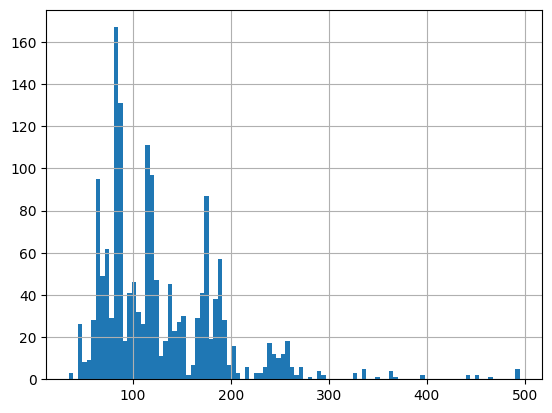

In [ ]:
df = df_train.copy()
df['Max_Power_Value'] = df['Max_Power_Value'].fillna(df['Max_Power_Value'].median())
df['Max_Power_Value_Log'] = np.log(df['Max_Power_Value'])
Q1 = df['Max_Power_Value_Log'].quantile(0.25)
Q3 = df['Max_Power_Value_Log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nXử lý outliers:")
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

df['Max_Power_Value_Log_Processed'] = df['Max_Power_Value_Log'].clip(lower=lower_bound, upper=upper_bound)
df['Max_Power_Value_Processed'] = np.exp(df['Max_Power_Value_Log_Processed'])
df_train['Max_Power_Value'] = df['Max_Power_Value_Processed']
df_train['Max_Power_Value'].hist(bins=100)

## Xử lý các cột bị null còn lại


Found 3 numerical columns with missing values:
Length                52
Height                52
Fuel Tank Capacity    90
dtype: int64

--- Distribution Analysis for Numerical Columns with Missing Data ---

--- Analyzing Column: 'Length' ---
  Missing Values: 52 (3.16%)
  Skewness: -0.02
  Mean: 4281.48
  Median: 4370.00


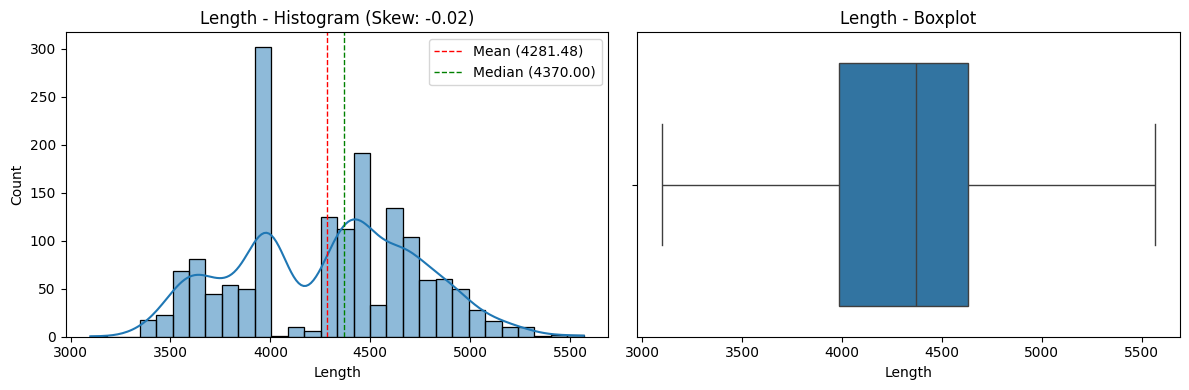


--- Analyzing Column: 'Height' ---
  Missing Values: 52 (3.16%)
  Skewness: 0.85
  Mean: 1592.42
  Median: 1550.00


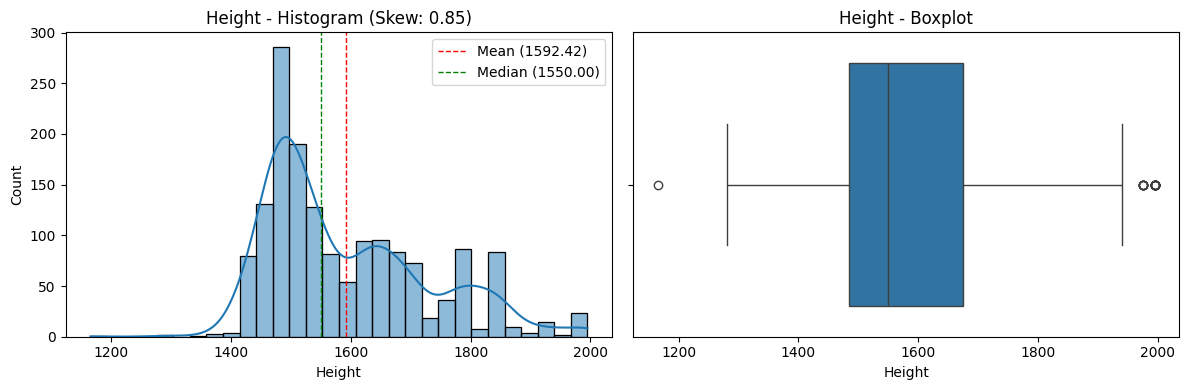


--- Analyzing Column: 'Fuel Tank Capacity' ---
  Missing Values: 90 (5.46%)
  Skewness: 0.82
  Mean: 52.15
  Median: 50.00


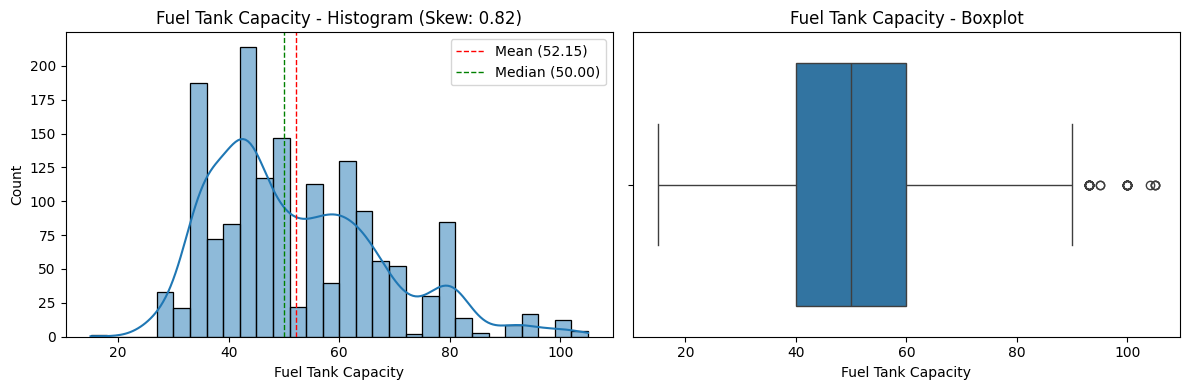

In [ ]:
# 2. Analyze Distribution of Affected Columns:
missing_info = df_train[numerical_cols].isnull().sum()
missing_numerical_cols = missing_info[missing_info > 0]

if missing_numerical_cols.empty:
    print("\nCongratulations! No missing values found in any numerical columns.")
else:
    print(f"\nFound {len(missing_numerical_cols)} numerical columns with missing values:")
    print(missing_numerical_cols)

    # 3. Analyze each column with missing values
    print("\n--- Distribution Analysis for Numerical Columns with Missing Data ---")
    for col in missing_numerical_cols.index:
        missing_count = missing_numerical_cols[col]
        total_count = len(df_train)
        missing_percentage = (missing_count / total_count) * 100
        skewness = df_train[col].skew()
        mean_val = df_train[col].mean()
        median_val = df_train[col].median()

        print(f"\n--- Analyzing Column: '{col}' ---")
        print(f"  Missing Values: {missing_count} ({missing_percentage:.2f}%)")
        print(f"  Skewness: {skewness:.2f}")
        print(f"  Mean: {mean_val:.2f}")
        print(f"  Median: {median_val:.2f}")

        # Plotting distribution
        plt.figure(figsize=(12, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_train[col], kde=True, bins=30)
        plt.title(f'{col} - Histogram (Skew: {skewness:.2f})')
        # Add vertical lines for mean and median
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean ({mean_val:.2f})')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median ({median_val:.2f})')
        plt.legend()


        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_train[col])
        plt.title(f'{col} - Boxplot')

        plt.tight_layout()
        plt.show()

In [ ]:
# Xử lý và chuyển đổi Max_Power_RPM
df_train['Max_Power_RPM'] = df_train['Max_Power_RPM'].str.strip().replace('', np.nan)
df_train['Max_Power_RPM'] = pd.to_numeric(df_train['Max_Power_RPM'], errors='coerce')

# Xử lý và chuyển đổi Max_Torque_RPM
df_train['Max_Torque_RPM'] = df_train['Max_Torque_RPM'].str.strip().replace('', np.nan)
df_train['Max_Torque_RPM'] = pd.to_numeric(df_train['Max_Torque_RPM'], errors='coerce')

In [ ]:
df_train['Max_Power_RPM'].unique()

array([  nan, 4000., 3750., 3600., 3400., 3800., 6600., 3500., 5200.,
       6500., 4200., 6200., 6000., 5500., 3000., 4300., 2910., 6400.,
       5100., 5250., 5000., 5600., 3200., 6300., 3900., 5678., 5150.,
       8250., 4400., 5800., 6250., 5700., 5400., 3700., 4250., 4500.,
       5300., 4700.])

In [ ]:
df_train['Max_Torque_RPM'].unique()

array([  nan, 1750., 1600., 1200., 2000., 4600., 1500., 2750., 1700.,
       1900., 1450., 4700., 3500., 4000., 1400., 4250., 4200., 2800.,
       1800., 4850., 4500., 1250., 3800., 4400., 4800., 3000., 2200.,
       1300., 2250., 2400., 3100., 4386., 2700., 1350., 2500., 1370.,
       3250., 3600., 3750., 4300., 1360., 5000., 3300., 2600., 1650.,
       3400., 1340., 2150., 6500., 4750.])


Found 2 numerical columns with missing values:
Max_Power_RPM     69
Max_Torque_RPM    65
dtype: int64

--- Distribution Analysis for Numerical Columns with Missing Data ---

--- Analyzing Column: 'Max_Power_RPM' ---
  Missing Values: 69 (4.19%)
  Skewness: 0.20
  Mean: 4828.77
  Median: 4200.00


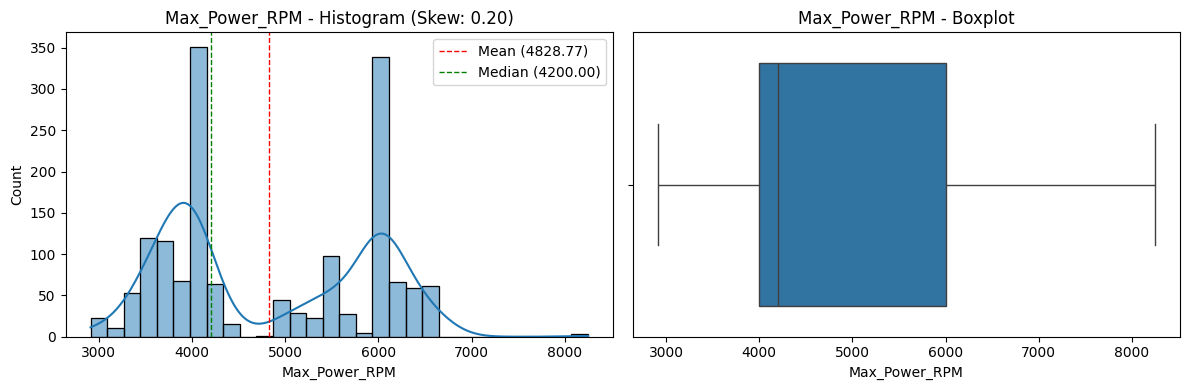


--- Analyzing Column: 'Max_Torque_RPM' ---
  Missing Values: 65 (3.95%)
  Skewness: 0.53
  Mean: 2621.88
  Median: 1900.00


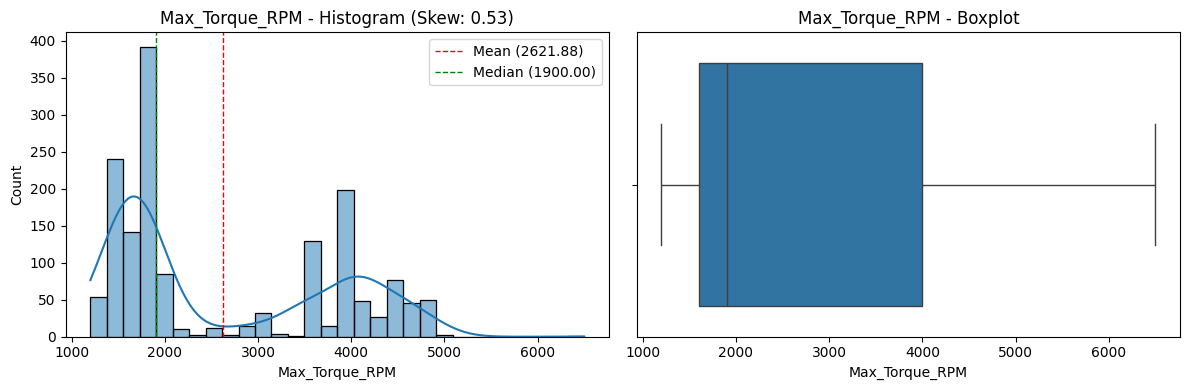

In [ ]:
# 2. Analyze Distribution of Affected Columns:
missing_info = df_train[['Max_Power_RPM', 'Max_Torque_RPM']].isnull().sum()
missing_numerical_cols = missing_info[missing_info > 0]

if missing_numerical_cols.empty:
    print("\nCongratulations! No missing values found in any numerical columns.")
else:
    print(f"\nFound {len(missing_numerical_cols)} numerical columns with missing values:")
    print(missing_numerical_cols)

    # 3. Analyze each column with missing values
    print("\n--- Distribution Analysis for Numerical Columns with Missing Data ---")
    for col in missing_numerical_cols.index:
        missing_count = missing_numerical_cols[col]
        total_count = len(df_train)
        missing_percentage = (missing_count / total_count) * 100
        skewness = df_train[col].skew()
        mean_val = df_train[col].mean()
        median_val = df_train[col].median()

        print(f"\n--- Analyzing Column: '{col}' ---")
        print(f"  Missing Values: {missing_count} ({missing_percentage:.2f}%)")
        print(f"  Skewness: {skewness:.2f}")
        print(f"  Mean: {mean_val:.2f}")
        print(f"  Median: {median_val:.2f}")

        # Plotting distribution
        plt.figure(figsize=(12, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_train[col], kde=True, bins=30)
        plt.title(f'{col} - Histogram (Skew: {skewness:.2f})')
        # Add vertical lines for mean and median
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean ({mean_val:.2f})')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median ({median_val:.2f})')
        plt.legend()


        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_train[col])
        plt.title(f'{col} - Boxplot')

        plt.tight_layout()
        plt.show()

In [ ]:
# Điền missing values cho Max_Power_RPM
df_train['Max_Power_RPM'] = df_train['Max_Power_RPM'].fillna(df_train['Max_Power_RPM'].median())

# Điền missing values cho Max_Torque_RPM
df_train['Max_Torque_RPM'] = df_train['Max_Torque_RPM'].fillna(df_train['Max_Torque_RPM'].median())

In [ ]:
missing_numerical_cols = ['Length', 'Height', 'Fuel Tank Capacity']
print(f"Columns to impute with median: {missing_numerical_cols}")

for col in missing_numerical_cols:
    # Calculate the median for the current column
    # Ensure we calculate median only on non-NaN values
    median_value = df_train[col].median()

    # Fill missing values (NaNs) with the calculated median
    df_train[col].fillna(median_value, inplace=True)

    print(f" -> Imputed '{col}' with median: {median_value:.2f}")

# --- Verification ---
print("\n--- Verification after Median Imputation ---")
remaining_missing = df_train[missing_numerical_cols].isnull().sum()
if remaining_missing.sum() == 0:
    print("Successfully imputed all identified numerical columns.")
    # Check missing values in the entire dataframe
    total_remaining_missing = df_train.isnull().sum().sum()
    if total_remaining_missing == 0:
        print("Congratulations! No missing values remaining in the entire DataFrame.")
    else:
            print(f"Warning: There are still {total_remaining_missing} missing values in other columns.")
            print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

else:
    print("Warning: Some missing values remain in the imputed columns:")
    print(remaining_missing[remaining_missing > 0])

Columns to impute with median: ['Length', 'Height', 'Fuel Tank Capacity']
 -> Imputed 'Length' with median: 4370.00
 -> Imputed 'Height' with median: 1550.00
 -> Imputed 'Fuel Tank Capacity' with median: 50.00

--- Verification after Median Imputation ---
Successfully imputed all identified numerical columns.
Drivetrain    111
dtype: int64


In [ ]:
df_train.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max_Power_Value,Max_Power_RPM,Max_Torque_Value,Max_Torque_RPM,Engine_Value
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,...,4370.0,1775.0,1550.0,5,50.0,117.0,4200.0,200.0,1900.0,1498.0
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,...,4454.0,2035.0,1545.0,5,63.0,184.0,4000.0,350.0,1750.0,1995.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,...,4585.0,1890.0,1785.0,7,70.0,138.0,3750.0,320.0,1600.0,1997.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,...,5207.0,2035.0,1823.0,7,90.0,326.0,3600.0,685.0,1200.0,2925.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,...,4795.0,1855.0,1835.0,7,80.0,174.0,3400.0,450.0,1600.0,2755.0



--- Analyzing Column: 'Kilometer' ---
  Skewness: 22.71
  Mean: 54206.36
  Median: 50000.00


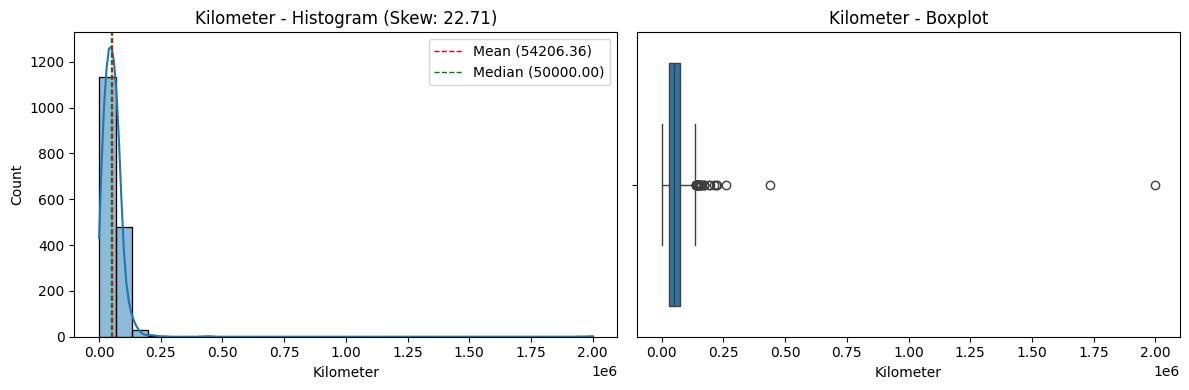

In [ ]:
col = "Kilometer"
skewness = df_train[col].skew()
mean_val = df_train[col].mean()
median_val = df_train[col].median()

print(f"\n--- Analyzing Column: '{col}' ---")
print(f"  Skewness: {skewness:.2f}")
print(f"  Mean: {mean_val:.2f}")
print(f"  Median: {median_val:.2f}")

# Plotting distribution
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_train[col], kde=True, bins=30)
plt.title(f'{col} - Histogram (Skew: {skewness:.2f})')
# Add vertical lines for mean and median
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean ({mean_val:.2f})')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median ({median_val:.2f})')
plt.legend()


# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_train[col])
plt.title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

In [ ]:
df['Kilometer_Log'] = np.log1p(df['Kilometer'])  # log1p để tránh vấn đề với giá trị 0

# 2. Xác định outliers trong không gian log
Q1 = df['Kilometer_Log'].quantile(0.25)
Q3 = df['Kilometer_Log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nXử lý outliers:")
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# 3. Xử lý outliers
df['Kilometer_Log_Processed'] = df['Kilometer_Log'].clip(lower=lower_bound, upper=upper_bound)

# 4. Chuyển ngược về không gian ban đầu
df['Kilometer_Processed'] = np.expm1(df['Kilometer_Log_Processed'])


Xử lý outliers:
Q1 (25%): 10.28
Q3 (75%): 11.18
IQR: 0.91
Lower bound: 8.91
Upper bound: 12.55



--- Analyzing Column: 'Kilometer_Processed' ---
  Skewness: 1.36
  Mean: 53190.99
  Median: 50000.00


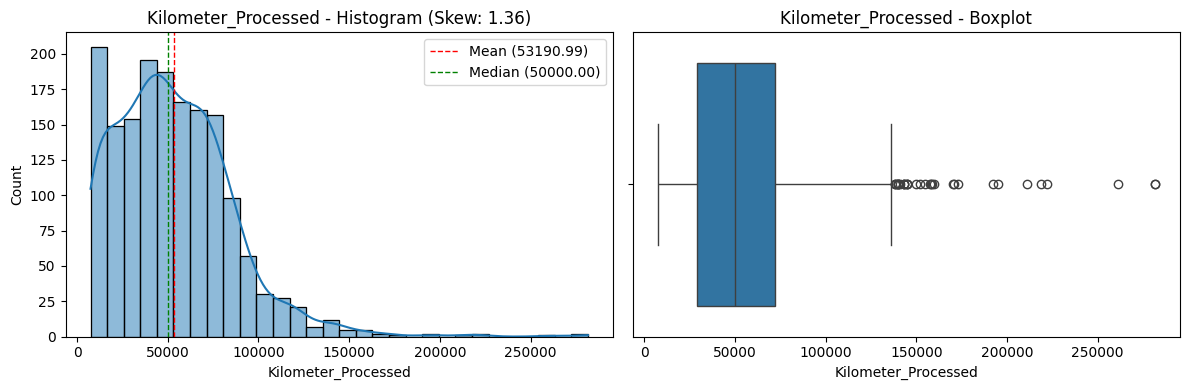

In [ ]:
col = "Kilometer_Processed"
skewness = df[col].skew()
mean_val = df[col].mean()
median_val = df[col].median()

print(f"\n--- Analyzing Column: '{col}' ---")
print(f"  Skewness: {skewness:.2f}")
print(f"  Mean: {mean_val:.2f}")
print(f"  Median: {median_val:.2f}")

# Plotting distribution
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'{col} - Histogram (Skew: {skewness:.2f})')
# Add vertical lines for mean and median
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean ({mean_val:.2f})')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median ({median_val:.2f})')
plt.legend()


# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df[col])
plt.title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

In [ ]:
df_train["Kilometer_Processed"] = df["Kilometer_Processed"]

## Save Temporary Data After Processing Numerical Columns

In [ ]:
df_train['Log_Price'] = np.log(df_train['Price'])
df_train.drop(columns=['Price'], inplace=True)

In [ ]:
df_train.to_csv("train_numerical_processing.csv", index=False)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 1647 non-null   object 
 1   Model                1647 non-null   object 
 2   Price                1647 non-null   int64  
 3   Year                 1647 non-null   int64  
 4   Kilometer            1647 non-null   int64  
 5   Fuel Type            1647 non-null   object 
 6   Transmission         1647 non-null   object 
 7   Location             1647 non-null   object 
 8   Color                1647 non-null   object 
 9   Owner                1647 non-null   object 
 10  Seller Type          1647 non-null   object 
 11  Drivetrain           1536 non-null   object 
 12  Length               1647 non-null   float64
 13  Width                1647 non-null   float64
 14  Height               1647 non-null   float64
 15  Seating Capacity     1647 non-null   i

In [ ]:
df_train.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Width,Height,Seating Capacity,Fuel Tank Capacity,Max_Power_Value,Max_Power_RPM,Max_Torque_Value,Max_Torque_RPM,Engine_Value,Kilometer_Processed
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,...,1775.0,1550.0,5,50.0,117.0,4200.0,200.0,1900.0,1498.0,75576.000000
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,...,2035.0,1545.0,5,63.0,184.0,4000.0,350.0,1750.0,1995.0,77000.000000
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,...,1890.0,1785.0,7,70.0,138.0,3750.0,320.0,1600.0,1997.0,112000.000000
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,...,2035.0,1823.0,7,90.0,326.0,3600.0,685.0,1200.0,2925.0,7412.523028
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,...,1855.0,1835.0,7,80.0,174.0,3400.0,450.0,1600.0,2755.0,73000.000000


# Explorary Data Analysis On Categorical Columns

In [ ]:
df_train = pd.read_csv("train_numerical_processing.csv")

In [ ]:
df_train.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Width,Height,Seating Capacity,Fuel Tank Capacity,Max_Power_Value,Max_Power_RPM,Max_Torque_Value,Max_Torque_RPM,Engine_Value,Kilometer_Processed
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,...,1775.0,1550.0,5,50.0,117.0,4200.0,200.0,1900.0,1498.0,75576.000000
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,...,2035.0,1545.0,5,63.0,184.0,4000.0,350.0,1750.0,1995.0,77000.000000
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,...,1890.0,1785.0,7,70.0,138.0,3750.0,320.0,1600.0,1997.0,112000.000000
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,...,2035.0,1823.0,7,90.0,326.0,3600.0,685.0,1200.0,2925.0,7412.523028
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,...,1855.0,1835.0,7,80.0,174.0,3400.0,450.0,1600.0,2755.0,73000.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 1647 non-null   object 
 1   Model                1647 non-null   object 
 2   Price                1647 non-null   int64  
 3   Year                 1647 non-null   int64  
 4   Kilometer            1647 non-null   int64  
 5   Fuel Type            1647 non-null   object 
 6   Transmission         1647 non-null   object 
 7   Location             1647 non-null   object 
 8   Color                1647 non-null   object 
 9   Owner                1647 non-null   object 
 10  Seller Type          1647 non-null   object 
 11  Drivetrain           1536 non-null   object 
 12  Length               1647 non-null   float64
 13  Width                1647 non-null   float64
 14  Height               1647 non-null   float64
 15  Seating Capacity     1647 non-null   i

In [ ]:
categorical_columns = [
    'Make',
    'Fuel Type',
    'Transmission',
    'Location',
    'Color',
    'Owner',
    'Seller Type',
    'Drivetrain'
]

In [ ]:
for col in categorical_columns:
    unique_values = df_train[col].unique()
    value_counts = df_train[col].value_counts()

    print(f"\n--- Unique Values and Frequencies for column '{col}' ---")
    print("Unique Values:")
    print(unique_values)
    print("\nFrequencies:")
    print(value_counts)
    print("\nPercentage")
    print(value_counts / len(df_train) * 100)


--- Unique Values and Frequencies for column 'Make' ---
Unique Values:
['BMW' 'Mahindra' 'Mercedes-Benz' 'Toyota' 'Maruti Suzuki' 'Land Rover'
 'Ford' 'Honda' 'Hyundai' 'Volvo' 'Tata' 'MG' 'Nissan' 'Audi' 'Renault'
 'Isuzu' 'Skoda' 'MINI' 'Jaguar' 'Mitsubishi' 'Kia' 'Datsun' 'Volkswagen'
 'Jeep' 'Porsche' 'Fiat' 'Ssangyong' 'Chevrolet' 'Lexus' 'Rolls-Royce'
 'Lamborghini']

Frequencies:
Make
Maruti Suzuki    349
Hyundai          288
Mercedes-Benz    141
Honda            119
Toyota           113
Audi             109
Mahindra          94
BMW               91
Tata              49
Ford              43
Renault           38
Volkswagen        34
Skoda             32
Land Rover        24
Jaguar            17
Jeep              14
Volvo             13
Kia               12
Nissan            10
MG                10
MINI               9
Porsche            9
Datsun             7
Chevrolet          5
Lexus              4
Rolls-Royce        3
Mitsubishi         3
Ssangyong          3
Fiat            


--- Summary Table for 'Make' ---
                Unique Value    Mean Price  Frequency
Make                                                 
Audi                    Audi  2.711560e+06        109
BMW                      BMW  3.886813e+06         91
Chevrolet          Chevrolet  3.368000e+05          5
Datsun                Datsun  2.911429e+05          7
Fiat                    Fiat  3.050000e+05          2
Ford                    Ford  1.597163e+06         43
Honda                  Honda  6.218235e+05        119
Hyundai              Hyundai  7.309791e+05        288
Isuzu                  Isuzu  1.791000e+06          1
Jaguar                Jaguar  3.564647e+06         17
Jeep                    Jeep  2.054928e+06         14
Kia                      Kia  1.479917e+06         12
Lamborghini      Lamborghini  2.400000e+07          1
Land Rover        Land Rover  7.478083e+06         24
Lexus                  Lexus  4.118750e+06          4
MG                        MG  1.941100e+06      

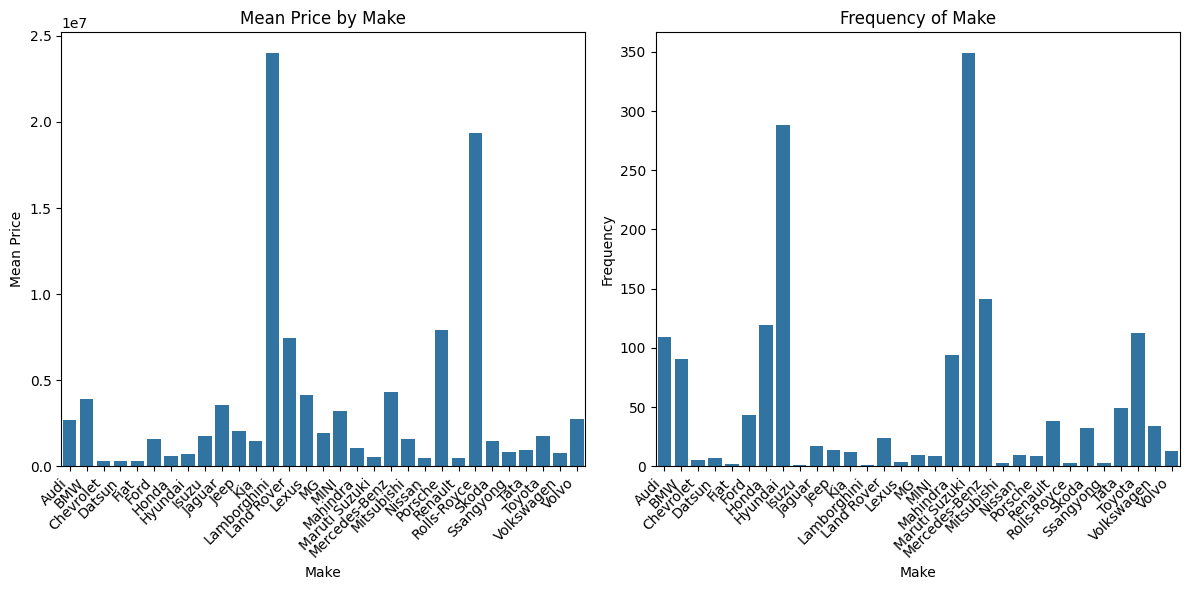


--- Summary Table for 'Fuel Type' ---
              Unique Value    Mean Price  Frequency
Fuel Type                                          
CNG                    CNG  4.481579e+05         38
CNG + CNG        CNG + CNG  2.490000e+05          1
Diesel              Diesel  2.106313e+06        839
Electric          Electric  1.387000e+06          5
Hybrid              Hybrid  7.166667e+06          3
LPG                    LPG  2.137500e+05          4
Petrol              Petrol  1.296951e+06        756
Petrol + LPG  Petrol + LPG  1.300000e+05          1


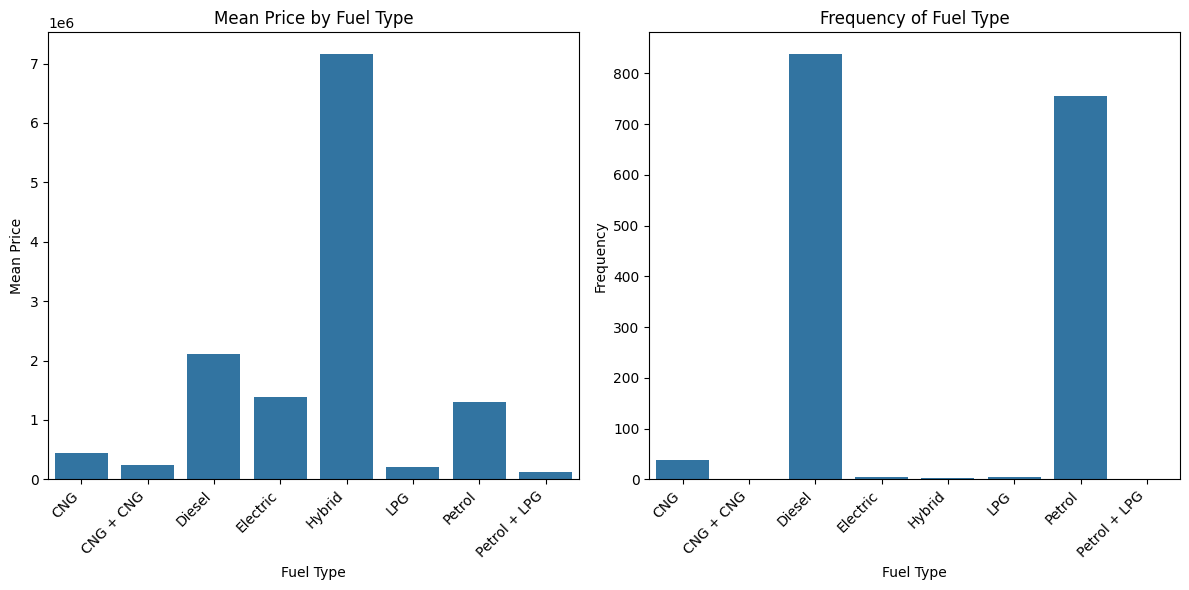


--- Summary Table for 'Transmission' ---
             Unique Value    Mean Price  Frequency
Transmission                                      
Automatic       Automatic  2.944572e+06        746
Manual             Manual  6.634184e+05        901


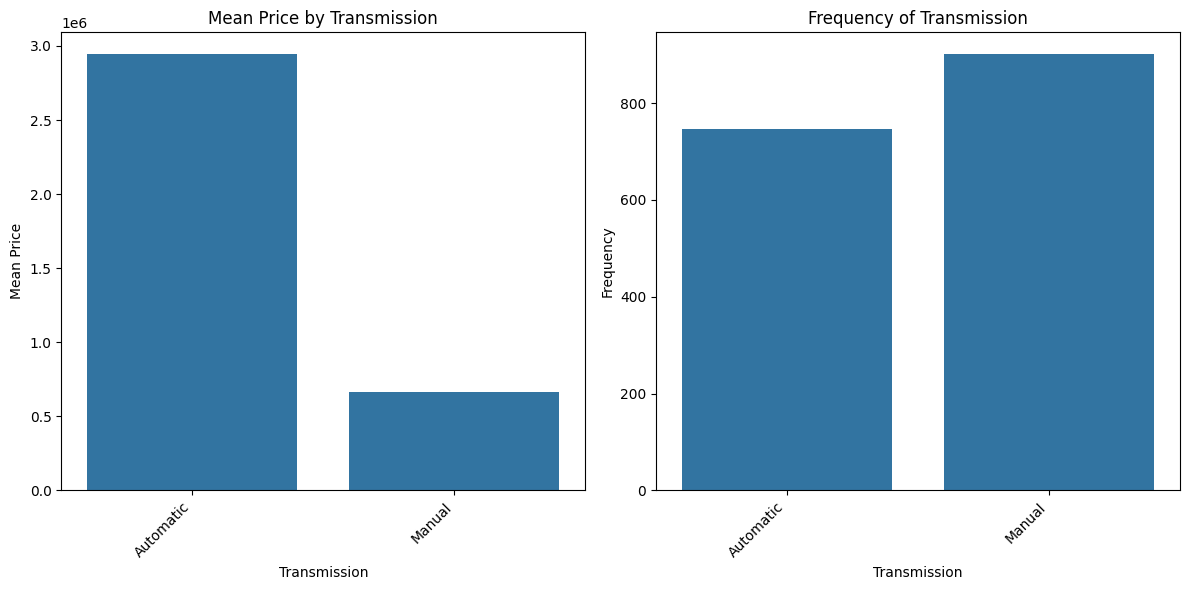


--- Summary Table for 'Location' ---
              Unique Value    Mean Price  Frequency
Location                                           
Agra                  Agra  8.277499e+05         16
Ahmedabad        Ahmedabad  1.377054e+06         56
Allahabad        Allahabad  6.083333e+05          3
Ambala Cantt  Ambala Cantt  3.904545e+05         11
Amritsar          Amritsar  4.837500e+05          4
...                    ...           ...        ...
Valsad              Valsad  5.800000e+05          1
Varanasi          Varanasi  5.011874e+05         16
Warangal          Warangal  4.250000e+05          2
Yamunanagar    Yamunanagar  8.850000e+05          4
Zirakpur          Zirakpur  6.726998e+05         10

[76 rows x 3 columns]


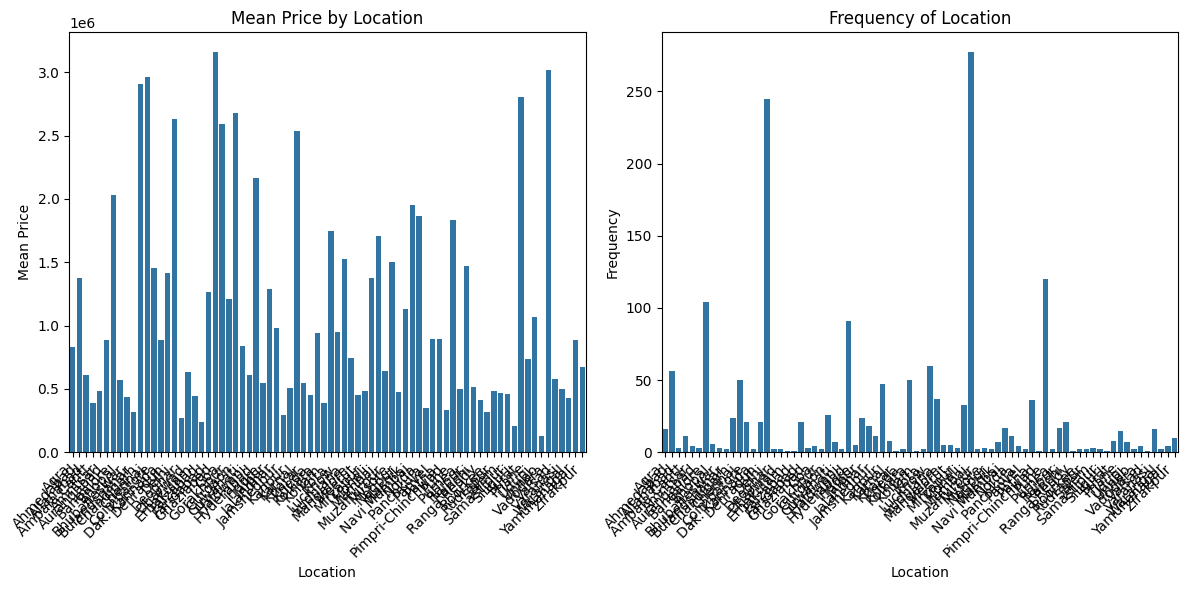


--- Summary Table for 'Color' ---
       Unique Value    Mean Price  Frequency
Color                                       
Beige         Beige  1.260000e+06          6
Black         Black  2.884015e+06        135
Blue           Blue  3.009687e+06        144
Bronze       Bronze  1.528136e+06         22
Brown         Brown  1.110214e+06         70
Gold           Gold  7.926800e+05         25
Green         Green  1.310500e+06         16
Grey           Grey  1.239761e+06        176
Maroon       Maroon  1.307909e+06         33
Orange       Orange  1.126500e+06         10
Others       Others  6.432999e+05         10
Pink           Pink  1.350000e+05          1
Purple       Purple  1.383500e+06          4
Red             Red  1.358267e+06        120
Silver       Silver  9.299233e+05        222
White         White  1.762014e+06        647
Yellow       Yellow  2.965167e+06          6


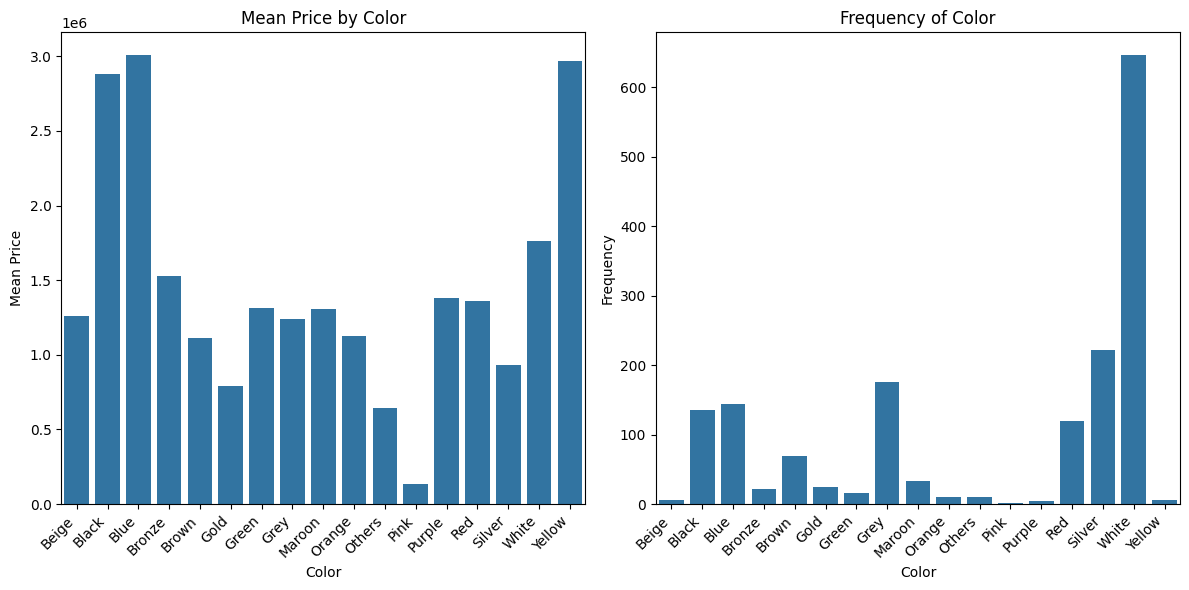


--- Summary Table for 'Owner' ---
                      Unique Value    Mean Price  Frequency
Owner                                                      
4 or More                4 or More  1.200000e+05          1
First                        First  1.706079e+06       1300
Fourth                      Fourth  1.633333e+05          3
Second                      Second  1.488639e+06        288
Third                        Third  2.008105e+06         38
UnRegistered Car  UnRegistered Car  4.167176e+06         17


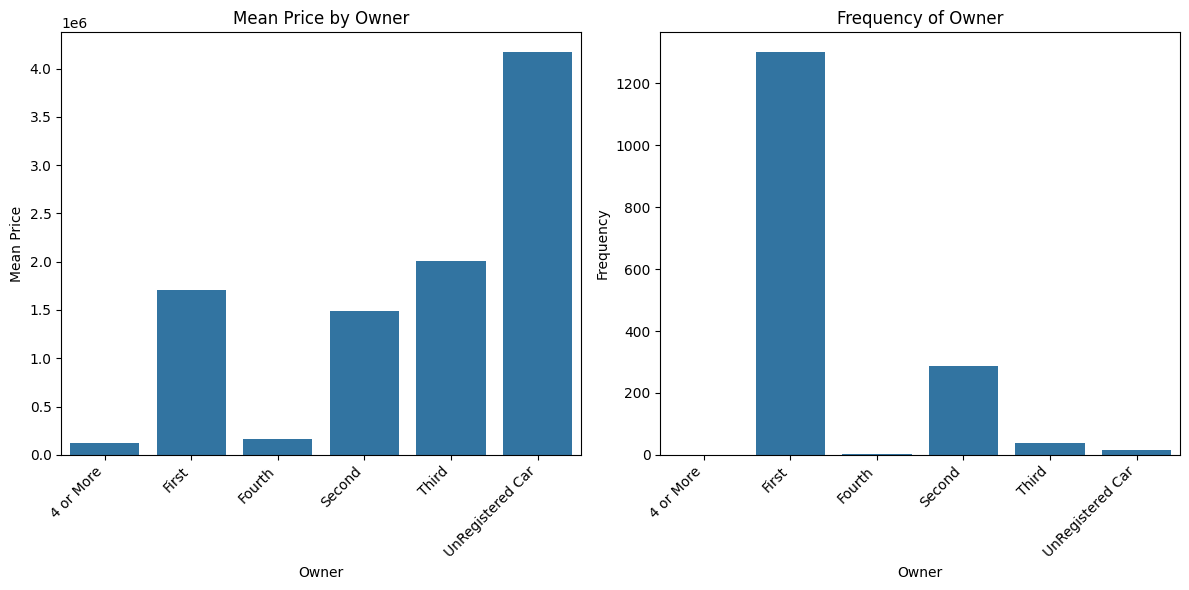


--- Summary Table for 'Seller Type' ---
                                    Unique Value    Mean Price  Frequency
Seller Type                                                              
Commercial Registration  Commercial Registration  5.190000e+05          5
Corporate                              Corporate  2.960745e+06         47
Individual                            Individual  1.663098e+06       1595


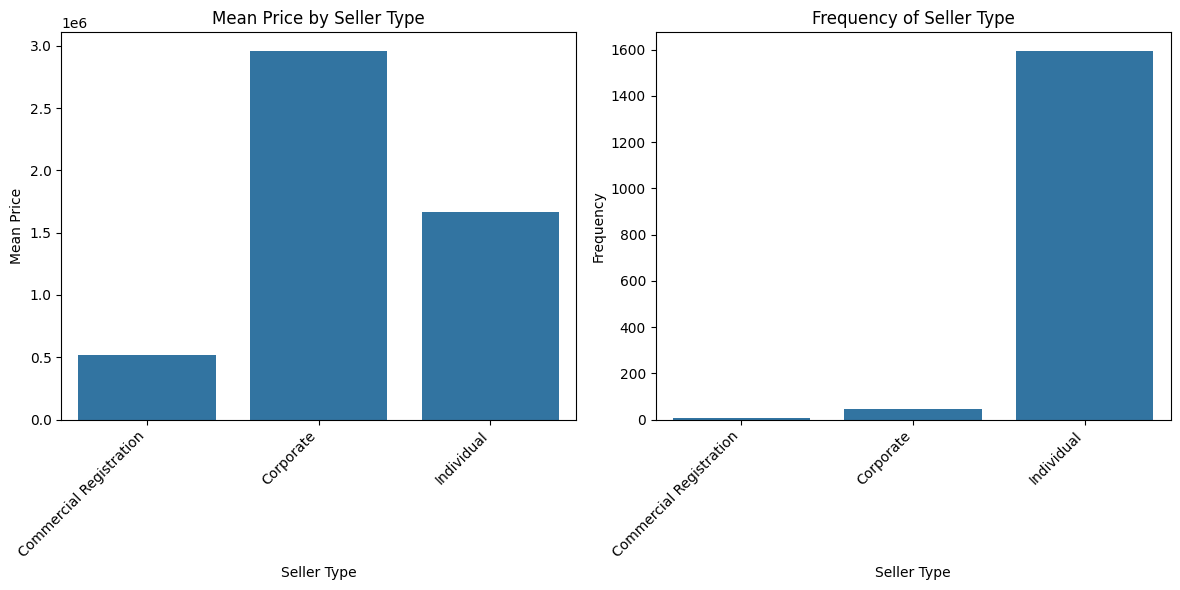


--- Summary Table for 'Drivetrain' ---
           Unique Value    Mean Price  Frequency
Drivetrain                                      
AWD                 AWD  4.290872e+06        219
FWD                 FWD  8.999557e+05       1062
RWD                 RWD  3.095255e+06        255


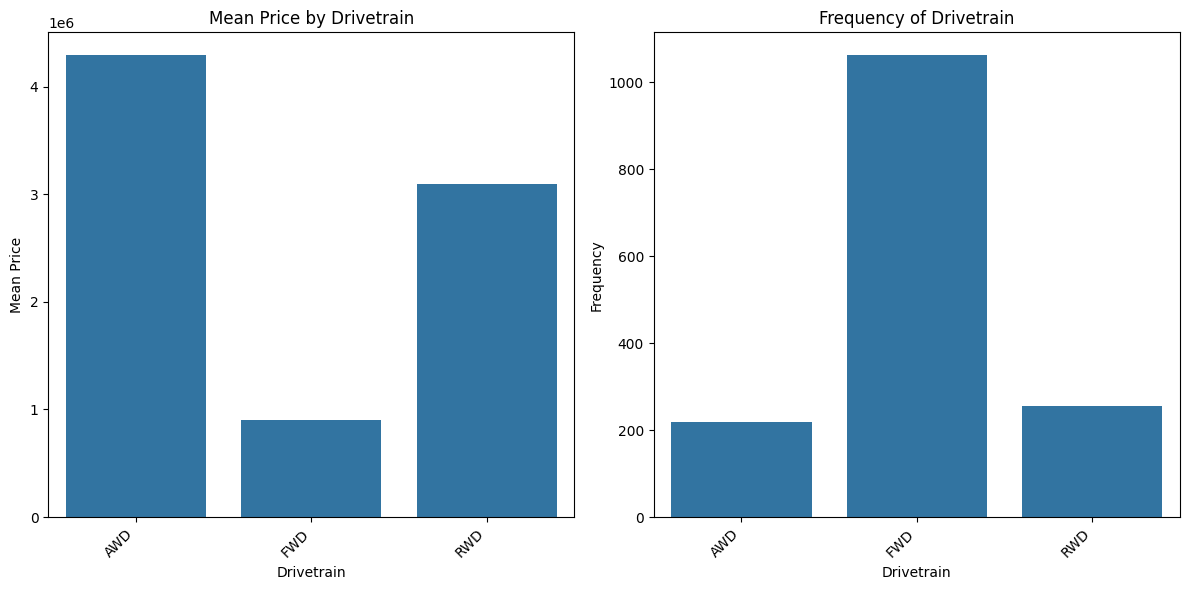

In [ ]:
for col in categorical_columns:
    # Calculate mean Price for each category
    mean_price_by_category = df_train.groupby(col)['Price'].mean()

    # Create a table with unique values, frequencies, and mean prices
    summary_table = pd.DataFrame({
        'Unique Value': mean_price_by_category.index,
        'Mean Price': mean_price_by_category.values,
        'Frequency': df_train[col].value_counts().sort_index()  # Ensure correct alignment
    })

    # Display the table
    print(f"\n--- Summary Table for '{col}' ---")
    print(summary_table)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=summary_table['Unique Value'], y=summary_table['Mean Price'])
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Mean Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Price')

    plt.subplot(1, 2, 2)
    sns.barplot(x=summary_table['Unique Value'], y=summary_table['Frequency'])
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

## Xử lý trên cột Make

1. Đọc thông tin từ cột Make
- Số lượng giá trị lớn: Hơn 30 hãng xe khác nhau. One-hot encoding sẽ tạo ra quá nhiều biến mới
- Phân bố không đồng đều: Một số hãng rất phổ biến (Maruti Suzuki: 349, Huyndai: 288), trong khi một số khác cực kỳ hiếm (Lamborghini, Isuzu: 1)
- Giá trị quá cao bất thường: Một số hãng như Rolls-Royce, Lamborghini (24M) có giá trị trung bình cao hơn nhiều so với các hàng phổ thông

2. Sử dụng Smoothed Target Encoding
- **Bảo toàn thông tin tương quan**: Sử dụng giá trị trung bình của mỗi hãng làm giá trị mã hóa, giúp bảo toàn mối tương quan thực tế giữa hãng xe và giá tiền. Điều này mang lại hiệu quả cao hơn các phương pháo mã hóa thông thường như label encoding hay one-hot encoding
- **Giảm kích thước dữ liệu**
- **Kỹ thuật smoothing giải quyết vấn đề tần suất thấp**:
\begin{equation}
smoothed\_value = (frequency * mean\_price + k * global\_mean) / (frequency + k)
\end{equation}
    - **Hãng phổ biến**: Giá trị encoded gần với giá trị trung bình thực tế của hãng
    - **Hãng hiếm**: Giá trị được kéo về giá trị trung bình toàn cục
- **Xử lý riêng cho xe sang**: Các hãng xe có giá trị quá cao có thể gây nhiễu. Nhóm thành một nhóm riêng giúp giảm thiểu ảnh hướng của các điểm dữ liệu cực đoan này.
- **Chiến lược cho dữ liệu mới**: Nếu gặp dữ liệu chưa từng thấy trong dữ liệu huấn luyện, ta có thể dung trung bình toàn cục, đảm bảo mô hình luôn hoạt động nhất quán.


In [ ]:
df_train["Log_Price"] = np.log(df_train["Price"])

In [ ]:
make_counts = df_train['Make'].value_counts()
print(f"Số lượng hãng xe khác nhau: {len(make_counts)}")
print("\nTop 10 hãng xe phổ biến nhất:")
print(make_counts.head(10))
print("\nTop 10 hãng xe hiếm nhất:")
print(make_counts.tail(10))

Số lượng hãng xe khác nhau: 31

Top 10 hãng xe phổ biến nhất:
Make
Maruti Suzuki    349
Hyundai          288
Mercedes-Benz    141
Honda            119
Toyota           113
Audi             109
Mahindra          94
BMW               91
Tata              49
Ford              43
Name: count, dtype: int64

Top 10 hãng xe hiếm nhất:
Make
Porsche        9
Datsun         7
Chevrolet      5
Lexus          4
Rolls-Royce    3
Mitsubishi     3
Ssangyong      3
Fiat           2
Isuzu          1
Lamborghini    1
Name: count, dtype: int64


In [ ]:
# Tính giá trung bình theo hãng xe
make_price_stats = df_train.groupby('Make')['Log_Price'].agg(['mean', 'count']).reset_index()
make_price_stats = make_price_stats.rename(columns={'mean': 'mean_price', 'count': 'frequency'})
make_price_stats = make_price_stats.sort_values('frequency', ascending=False)

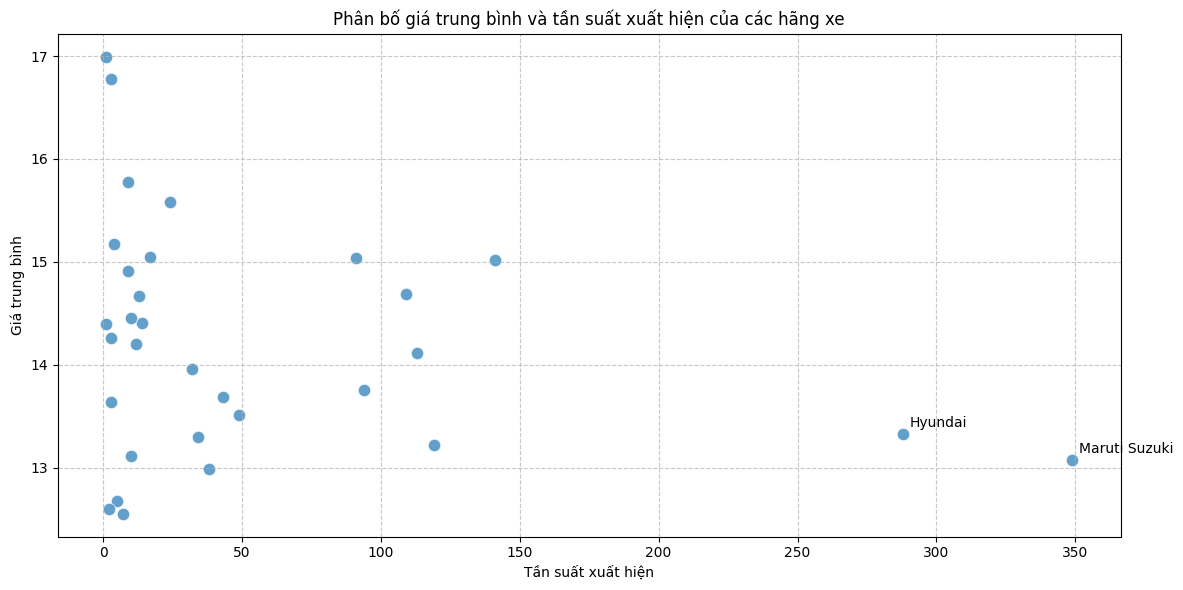

In [ ]:
# Vẽ biểu đồ phân bố giá theo hãng xe
plt.figure(figsize=(12, 6))
sns.scatterplot(data=make_price_stats, x='frequency', y='mean_price', s=80, alpha=0.7)
plt.title('Phân bố giá trung bình và tần suất xuất hiện của các hãng xe')
plt.xlabel('Tần suất xuất hiện')
plt.ylabel('Giá trung bình')
plt.grid(True, linestyle='--', alpha=0.7)

# Thêm tên hãng xe cho một số điểm đặc biệt
for i, row in make_price_stats.iterrows():
    # Chỉ hiển thị nhãn cho các hãng có giá cao hoặc tần suất đặc biệt
    if row['mean_price'] > 10000000 or row['frequency'] > 200 or (row['mean_price'] > 3000000 and row['frequency'] < 10):
        plt.annotate(row['Make'], (row['frequency'], row['mean_price']),
                    xytext=(5, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

In [ ]:
# Tính global weighted mean price
global_mean = np.average(make_price_stats['mean_price'], weights=make_price_stats['frequency'])
print(f"Giá trung bình toàn cục (có trọng số): {global_mean:.2f}")

Giá trung bình toàn cục (có trọng số): 13.81


In [ ]:
# Tham số điều chỉnh smoothing
k = 5  # Có thể thay đổi để tìm giá trị tối ưu

# Áp dụng công thức smoothing
make_price_stats['smoothed_price'] = (make_price_stats['frequency'] * make_price_stats['mean_price'] +
                                     k * global_mean) / (make_price_stats['frequency'] + k)

# So sánh giá trị trước và sau khi smoothing cho các hãng có tần suất thấp và cao
print("\nHãng xe với tần suất thấp (< 5):")
low_freq = make_price_stats[make_price_stats['frequency'] < 5][['Make', 'mean_price', 'frequency', 'smoothed_price']]
print(low_freq)

print("\nHãng xe với tần suất cao (> 200):")
high_freq = make_price_stats[make_price_stats['frequency'] > 200][['Make', 'mean_price', 'frequency', 'smoothed_price']]
print(high_freq)

# Vẽ biểu đồ so sánh trước và sau smoothing
plt.figure(figsize=(12, 6))
# Lọc các hãng có tần suất thấp để dễ nhìn
sample_makes = make_price_stats[(make_price_stats['frequency'] < 50) | (make_price_stats['frequency'] > 200)].copy()
sample_makes = sample_makes.sort_values('frequency')


Hãng xe với tần suất thấp (< 5):
           Make  mean_price  frequency  smoothed_price
14        Lexus   15.174290          4       14.414618
26    Ssangyong   13.640937          3       13.744651
20   Mitsubishi   14.262733          3       13.977825
24  Rolls-Royce   16.776123          3       14.920346
4          Fiat   12.601011          2       13.462346
12  Lamborghini   16.993564          1       14.337994
8         Isuzu   14.398285          1       13.905447

Hãng xe với tần suất cao (> 200):
             Make  mean_price  frequency  smoothed_price
18  Maruti Suzuki   13.077353        349       13.087657
7         Hyundai   13.324606        288       13.332836


<Figure size 1200x600 with 0 Axes>

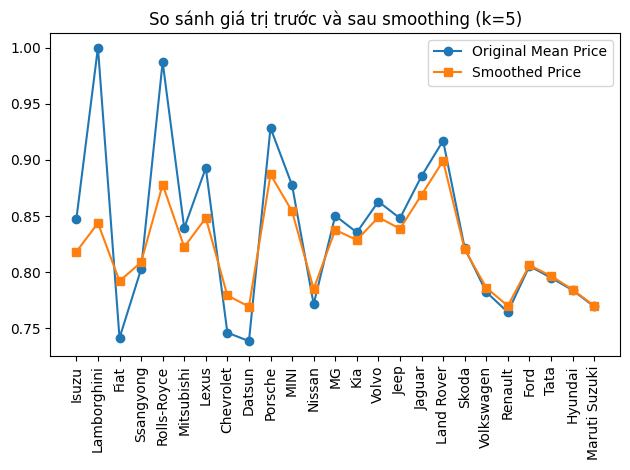

In [ ]:
# Chuẩn hóa giá trị để so sánh tốt hơn
max_price = sample_makes['mean_price'].max()
sample_makes['mean_price_norm'] = sample_makes['mean_price'] / max_price
sample_makes['smoothed_price_norm'] = sample_makes['smoothed_price'] / max_price

# Plot
plt.plot(sample_makes['Make'], sample_makes['mean_price_norm'], 'o-', label='Original Mean Price')
plt.plot(sample_makes['Make'], sample_makes['smoothed_price_norm'], 's-', label='Smoothed Price')
plt.xticks(rotation=90)
plt.legend()
plt.title(f'So sánh giá trị trước và sau smoothing (k={k})')
plt.tight_layout()
plt.show()

In [ ]:
make_price_stats['final_encoded_price'] = make_price_stats['smoothed_price']
# Tạo mapping từ Make đến giá trị encoded
make_encoding_map = make_price_stats[['Make', 'final_encoded_price']].set_index('Make').to_dict()['final_encoded_price']
make_encoding_map

{'Maruti Suzuki': 13.0876568212651,
 'Hyundai': 13.332835658211609,
 'Mercedes-Benz': 14.979287245081439,
 'Honda': 13.247622182348156,
 'Toyota': 14.103649799670542,
 'Audi': 14.645617786857711,
 'Mahindra': 13.7548285741869,
 'BMW': 14.970197610360676,
 'Tata': 13.539726337744348,
 'Ford': 13.701192212433263,
 'Renault': 13.085894547754995,
 'Volkswagen': 13.36190214923346,
 'Skoda': 13.940173966008981,
 'Land Rover': 15.278102064185989,
 'Jaguar': 14.766056716400424,
 'Jeep': 14.252383454646322,
 'Volvo': 14.426292544644863,
 'Kia': 14.082939331174831,
 'MG': 14.235879202727373,
 'Nissan': 13.343536423603807,
 'MINI': 14.516270808655126,
 'Porsche': 15.073386981633433,
 'Datsun': 13.076001247571691,
 'Chevrolet': 13.244374287794319,
 'Lexus': 14.414617681160243,
 'Ssangyong': 13.744651156585752,
 'Mitsubishi': 13.977824558629855,
 'Rolls-Royce': 14.920345808680235,
 'Fiat': 13.462345798374823,
 'Lamborghini': 14.337993813142857,
 'Isuzu': 13.905447195264628}

In [ ]:
# Lưu mapping để sử dụng cho dữ liệu test sau này
import pickle
with open('make_encoding_map.pkl', 'wb') as f:
    pickle.dump({'map': make_encoding_map, 'global_mean': global_mean}, f)

print("\nĐã lưu mapping vào file 'make_encoding_map.pkl' để sử dụng cho dữ liệu test")


Đã lưu mapping vào file 'make_encoding_map.pkl' để sử dụng cho dữ liệu test


In [ ]:
df_train['Make_encoded'] = df_train['Make'].map(make_encoding_map)
df_train['Make_encoded'].fillna(global_mean, inplace=True)

In [ ]:
# Tính hệ số tương quan
correlation = df_train['Make_encoded'].corr(df_train['Log_Price'])
print(f"\nHệ số tương quan giữa Make_encoded và Log_Price: {correlation:.4f}")


Hệ số tương quan giữa Make_encoded và Log_Price: 0.7848


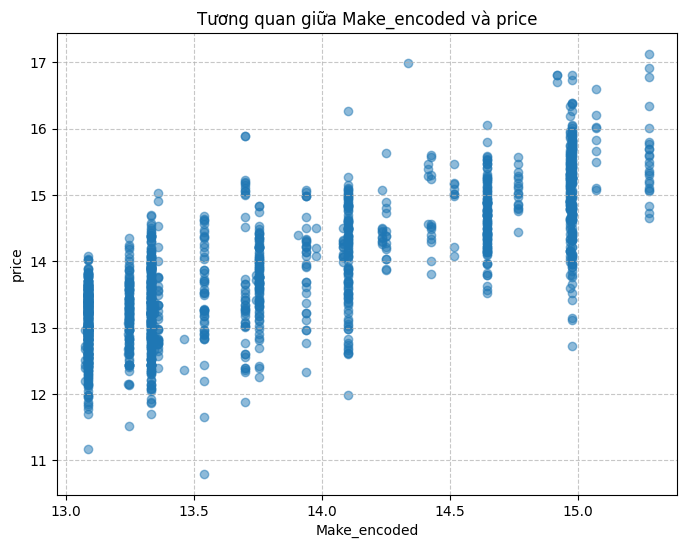

In [ ]:
# Kiểm tra mối tương quan với biến mục tiêu
plt.figure(figsize=(8, 6))
plt.scatter(df_train['Make_encoded'], df_train['Log_Price'], alpha=0.5)
plt.title('Tương quan giữa Make_encoded và price')
plt.xlabel('Make_encoded')
plt.ylabel('price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Xử lí Drivetrain

In [9]:
# Tính giá trung bình theo hãng xe
print(f"Mode: " + df_train['Drivetrain'].mode()[0])
df_train.fillna(df_train['Drivetrain'].mode()[0], inplace=True)
make_price_stats = df_train.groupby('Drivetrain')['Log_Price'].agg(['mean', 'count']).reset_index()
make_price_stats = make_price_stats.rename(columns={'mean': 'mean_price', 'count': 'frequency'})
make_price_stats = make_price_stats.sort_values('frequency', ascending=False)

Mode: FWD


In [10]:
# Tính global weighted mean price
global_mean = np.average(make_price_stats['mean_price'], weights=make_price_stats['frequency'])
print(f"Giá trung bình toàn cục (có trọng số): {global_mean:.2f}")

Giá trung bình toàn cục (có trọng số): 13.81


In [12]:
# Tham số điều chỉnh smoothing
k = 0  # Có thể thay đổi để tìm giá trị tối ưu

# Áp dụng công thức smoothing
make_price_stats['smoothed_price'] = (make_price_stats['frequency'] * make_price_stats['mean_price'] +
                                     k * global_mean) / (make_price_stats['frequency'] + k)

# So sánh giá trị trước và sau khi smoothing cho các hãng có tần suất thấp và cao
print("\nHãng xe với tần suất thấp (< 5):")
low_freq = make_price_stats[make_price_stats['frequency'] < 5][['Drivetrain', 'mean_price', 'frequency', 'smoothed_price']]
print(low_freq)

print("\nHãng xe với tần suất cao (> 200):")
high_freq = make_price_stats[make_price_stats['frequency'] > 200][['Drivetrain', 'mean_price', 'frequency', 'smoothed_price']]
print(high_freq)

# Vẽ biểu đồ so sánh trước và sau smoothing
plt.figure(figsize=(12, 6))
# Lọc các hãng có tần suất thấp để dễ nhìn
sample_makes = make_price_stats[(make_price_stats['frequency'] < 50) | (make_price_stats['frequency'] > 200)].copy()
sample_makes = sample_makes.sort_values('frequency')


Hãng xe với tần suất thấp (< 5):
Empty DataFrame
Columns: [Drivetrain, mean_price, frequency, smoothed_price]
Index: []

Hãng xe với tần suất cao (> 200):
  Drivetrain  mean_price  frequency  smoothed_price
1        FWD   13.420026       1173       13.420026
2        RWD   14.576674        255       14.576674
0        AWD   14.982594        219       14.982594


<Figure size 1200x600 with 0 Axes>

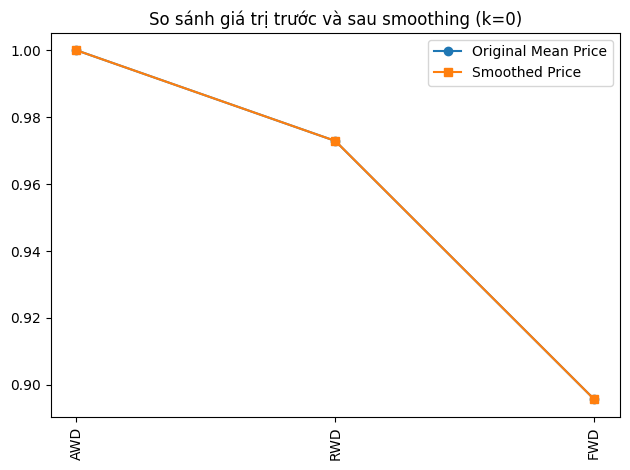

In [13]:
# Chuẩn hóa giá trị để so sánh tốt hơn
max_price = sample_makes['mean_price'].max()
sample_makes['mean_price_norm'] = sample_makes['mean_price'] / max_price
sample_makes['smoothed_price_norm'] = sample_makes['smoothed_price'] / max_price

# Plot
plt.plot(sample_makes['Drivetrain'], sample_makes['mean_price_norm'], 'o-', label='Original Mean Price')
plt.plot(sample_makes['Drivetrain'], sample_makes['smoothed_price_norm'], 's-', label='Smoothed Price')
plt.xticks(rotation=90)
plt.legend()
plt.title(f'So sánh giá trị trước và sau smoothing (k={k})')
plt.tight_layout()
plt.show()

In [16]:
make_price_stats['final_encoded_price'] = make_price_stats['smoothed_price']
# Tạo mapping từ Make đến giá trị encoded
make_encoding_map = make_price_stats[['Drivetrain', 'final_encoded_price']].set_index('Drivetrain').to_dict()['final_encoded_price']
make_encoding_map

{'FWD': 13.420026478630321,
 'RWD': 14.576673709596076,
 'AWD': 14.982593641119296}

In [18]:
df_train['Drivetrain_encoded'] = df_train['Drivetrain'].map(make_encoding_map)
df_train['Drivetrain_encoded'].fillna(global_mean, inplace=True)

In [19]:
df_train['Drivetrain_encoded'].mean(), df_train['Drivetrain_encoded'].std()

(np.float64(13.80687969810898), 0.6183596634916549)

## Xử lý trên cột `Fuel Type`

1. Sử dụng Group-Rare Encoding + One-hot Encoding
- **Số lượng giá trị ít**: Biến `Fuel-Type` chỉ có 8 giá trị unique. One-hot encoding sẽ không tạo ra quá nhiều biến mới
- **Có các giá trị hiếm cần nhóm**: `CNG_CNG`, `Petrol+LPG`, `Hybrid`, `Electric`, `LPG` đều có tần suất thấp (<10)
- **Sự khác biệt về cấu trúc dữ liệu**: Nhiên liệu là đặc tính kỹ thuật khác biệt hoàn toàn (không phải phân cấp như hãng xe), nên việc biểu diễn chúng dưới dạng các biến nhị phân sẽ phù hợp hơn.
2. Cách thực hiện
- `CNG_CNG`: Nhóm với `CNG`
- `Petrol + LPG`: Nhóm với `LPG` hoặc tạo nhóm `Hybrid/Alternative`
- `Hybrid`, `Electic`, `LPG`: Có thể nhóm thành `Alternative Fuel`

In [ ]:
# Xem phân bố của các loại nhiên liệu
fuel_counts = df_train['Fuel Type'].value_counts()
print(f"Số lượng loại nhiên liệu khác nhau: {len(fuel_counts)}")
print("\nPhân bố của các loại nhiên liệu:")
print(fuel_counts)

Số lượng loại nhiên liệu khác nhau: 8

Phân bố của các loại nhiên liệu:
Fuel Type
Diesel          839
Petrol          756
CNG              38
Electric          5
LPG               4
Hybrid            3
CNG + CNG         1
Petrol + LPG      1
Name: count, dtype: int64


In [ ]:
def group_fuel_types(fuel_type):
    if fuel_type in ['Diesel']:
        return 'Diesel'
    elif fuel_type in ['Petrol']:
        return 'Petrol'
    elif fuel_type in ['CNG', 'CNG + CNG']:
        return 'CNG'
    else:
        return 'Others'  # Electric, Hybrid, LPG, Petrol + LPG

In [ ]:
df_train['Fuel_Type_Grouped'] = df_train['Fuel Type'].apply(group_fuel_types)

In [ ]:
fuel_grouped_counts = df_train['Fuel_Type_Grouped'].value_counts()
print("\nPhân bố sau khi nhóm:")
print(fuel_grouped_counts)


Phân bố sau khi nhóm:
Fuel_Type_Grouped
Diesel    839
Petrol    756
CNG        39
Others     13
Name: count, dtype: int64


In [ ]:
# Kiểm tra giá trị trung bình sau khi nhóm
fuel_grouped_price = df_train.groupby('Fuel_Type_Grouped')['Log_Price'].mean().reset_index()
print("\nGiá trung bình theo nhóm nhiên liệu:")
print(fuel_grouped_price)


Giá trung bình theo nhóm nhiên liệu:
  Fuel_Type_Grouped  Log_Price
0               CNG  12.896228
1            Diesel  14.157118
2            Others  13.729860
3            Petrol  13.466491


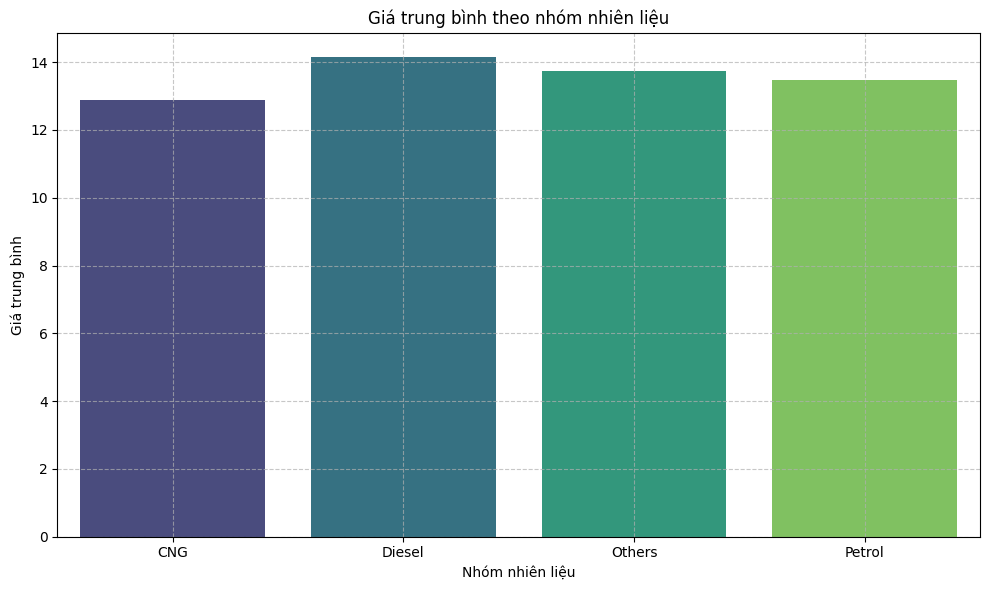

In [ ]:
# Vẽ biểu đồ giá trung bình sau khi nhóm
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel_Type_Grouped', y='Log_Price', data=fuel_grouped_price, palette='viridis')
plt.title('Giá trung bình theo nhóm nhiên liệu')
plt.xlabel('Nhóm nhiên liệu')
plt.ylabel('Giá trung bình')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
fuel_type_dummies = pd.get_dummies(df_train['Fuel_Type_Grouped'], prefix='Fuel')
fuel_type_dummies

,Fuel_CNG,Fuel_Diesel,Fuel_Others,Fuel_Petrol
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1642,False,True,False,False
1643,False,False,False,True
1644,False,False,False,True
1645,False,True,False,False


In [ ]:
df_train = pd.concat([df_train, fuel_type_dummies], axis=1)

In [ ]:
# Kiểm tra kết quả
print("\nDữ liệu sau khi thêm các cột one-hot:")
print(df_train[['Fuel Type', 'Fuel_Type_Grouped', 'Fuel_Diesel', 'Fuel_Petrol', 'Fuel_CNG', 'Fuel_Others']].head(10))


Dữ liệu sau khi thêm các cột one-hot:
  Fuel Type Fuel_Type_Grouped  Fuel_Diesel  Fuel_Petrol  Fuel_CNG  Fuel_Others
0    Diesel            Diesel         True        False     False        False
1    Diesel            Diesel         True        False     False        False
2    Diesel            Diesel         True        False     False        False
3    Diesel            Diesel         True        False     False        False
4    Diesel            Diesel         True        False     False        False
5    Diesel            Diesel         True        False     False        False
6    Diesel            Diesel         True        False     False        False
7    Diesel            Diesel         True        False     False        False
8    Diesel            Diesel         True        False     False        False
9    Diesel            Diesel         True        False     False        False


In [ ]:
# Tính hệ số tương quan giữa các biến one-hot và giá
correlation_with_price = pd.DataFrame({
    'Feature': ['Fuel_Diesel', 'Fuel_Petrol', 'Fuel_CNG', 'Fuel_Others'],
    'Correlation': [
        df_train['Fuel_Diesel'].corr(df_train['Log_Price']),
        df_train['Fuel_Petrol'].corr(df_train['Log_Price']),
        df_train['Fuel_CNG'].corr(df_train['Log_Price']),
        df_train['Fuel_Others'].corr(df_train['Log_Price'])
    ]
})

print("\nHệ số tương quan giữa các biến one-hot và giá:")
print(correlation_with_price.sort_values('Correlation', ascending=False))



Hệ số tương quan giữa các biến one-hot và giá:
       Feature  Correlation
0  Fuel_Diesel     0.363029
3  Fuel_Others    -0.006988
2     Fuel_CNG    -0.144259
1  Fuel_Petrol    -0.318932


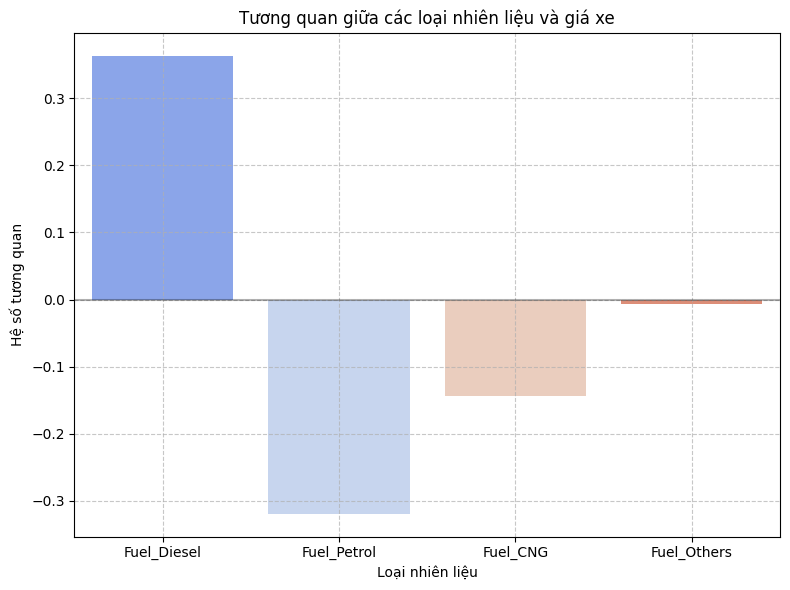

In [ ]:
# Vẽ biểu đồ tương quan
plt.figure(figsize=(8, 6))
sns.barplot(x='Feature', y='Correlation', data=correlation_with_price, palette='coolwarm')
plt.title('Tương quan giữa các loại nhiên liệu và giá xe')
plt.xlabel('Loại nhiên liệu')
plt.ylabel('Hệ số tương quan')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Tạo dictionary lưu thông tin nhóm
fuel_type_mapping = {
    'Diesel': 'Diesel',
    'Petrol': 'Petrol',
    'CNG': 'CNG',
    'CNG + CNG': 'CNG',
    'Electric': 'Others',
    'Hybrid': 'Others',
    'LPG': 'Others',
    'Petrol + LPG': 'Others'
}

# Lưu mapping để sử dụng cho dữ liệu test
import pickle
with open('fuel_type_mapping.pkl', 'wb') as f:
    pickle.dump(fuel_type_mapping, f)

In [ ]:
# # Nạp mapping từ file
# with open('fuel_type_mapping.pkl', 'rb') as f:
#     fuel_type_mapping = pickle.load(f)

# # Áp dụng nhóm cho dữ liệu test
# df_test['Fuel_Type_Grouped'] = df_test['Fuel Type'].map(fuel_type_mapping)
# df_test['Fuel_Type_Grouped'] = df_test['Fuel_Type_Grouped'].fillna('Others')  # Xử lý giá trị chưa biết

# # Tạo các cột one-hot
# fuel_type_dummies = pd.get_dummies(df_test['Fuel_Type_Grouped'], prefix='Fuel')

# # Đảm bảo có đủ cột như dữ liệu train
# for col in ['Fuel_Diesel', 'Fuel_Petrol', 'Fuel_CNG', 'Fuel_Others']:
#     if col not in fuel_type_dummies.columns:
#         fuel_type_dummies[col] = 0

# # Nối vào dataframe test
# df_test

## Xử lý trên cột Transmission

In [ ]:
# Xem phân bố của các loại hộp số
transmission_counts = df_train['Transmission'].value_counts()
print(f"Số lượng loại hộp số khác nhau: {len(transmission_counts)}")
print("\nPhân bố của các loại hộp số:")
print(transmission_counts)

Số lượng loại hộp số khác nhau: 2

Phân bố của các loại hộp số:
Transmission
Manual       901
Automatic    746
Name: count, dtype: int64


In [ ]:
# Tính giá trung bình theo loại hộp số
transmission_price_stats = df_train.groupby('Transmission')['Log_Price'].agg(['mean', 'count']).reset_index()
transmission_price_stats = transmission_price_stats.rename(columns={'mean': 'mean_price', 'count': 'frequency'})
transmission_price_stats = transmission_price_stats.sort_values('frequency', ascending=False)

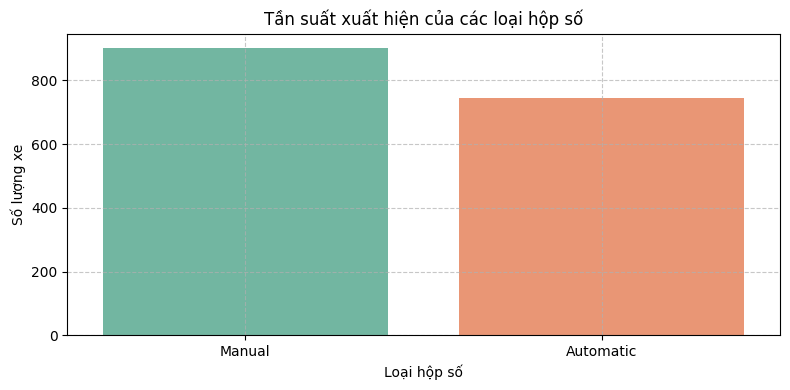

In [ ]:
# Vẽ biểu đồ phân bố tần suất
plt.figure(figsize=(8, 4))
sns.barplot(x='Transmission', y='frequency', data=transmission_price_stats, palette='Set2')
plt.title('Tần suất xuất hiện của các loại hộp số')
plt.xlabel('Loại hộp số')
plt.ylabel('Số lượng xe')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
transmission_dummies = pd.get_dummies(df_train['Transmission'], prefix='Transmission')
transmission_dummies

,Transmission_Automatic,Transmission_Manual
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
1642,False,True
1643,False,True
1644,False,True
1645,True,False


In [ ]:
df_train = pd.concat([df_train, transmission_dummies], axis=1)

In [ ]:
print(df_train[['Transmission', 'Transmission_Automatic', 'Transmission_Manual']].head(10))

  Transmission  Transmission_Automatic  Transmission_Manual
0    Automatic                    True                False
1    Automatic                    True                False
2       Manual                   False                 True
3    Automatic                    True                False
4    Automatic                    True                False
5       Manual                   False                 True
6       Manual                   False                 True
7    Automatic                    True                False
8    Automatic                    True                False
9       Manual                   False                 True



Hệ số tương quan giữa các biến one-hot và giá:
                  Feature  Correlation
0  Transmission_Automatic     0.657669
1     Transmission_Manual    -0.657669


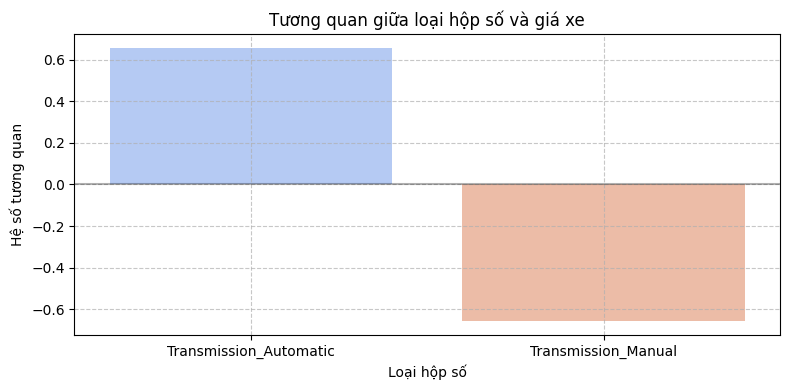

In [ ]:
# Tính hệ số tương quan giữa các biến one-hot và giá
correlation_with_price = pd.DataFrame({
    'Feature': ['Transmission_Automatic', 'Transmission_Manual'],
    'Correlation': [
        df_train['Transmission_Automatic'].corr(df_train['Log_Price']),
        df_train['Transmission_Manual'].corr(df_train['Log_Price'])
    ]
})

print("\nHệ số tương quan giữa các biến one-hot và giá:")
print(correlation_with_price)

# Vẽ biểu đồ tương quan
plt.figure(figsize=(8, 4))
sns.barplot(x='Feature', y='Correlation', data=correlation_with_price, palette='coolwarm')
plt.title('Tương quan giữa loại hộp số và giá xe')
plt.xlabel('Loại hộp số')
plt.ylabel('Hệ số tương quan')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Phần 4: Xử lý multicollinearity - Chọn một biến và loại bỏ biến còn lại
print("\nLưu ý về multicollinearity:")
print("Vì có tương quan hoàn hảo giữa Transmission_Automatic và Transmission_Manual (một cái bằng 1 thì cái kia bằng 0),")
print("trong mô hình hồi quy tuyến tính, chúng ta chỉ nên giữ lại một biến, ví dụ: Transmission_Automatic")
print("và loại bỏ biến còn lại để tránh vấn đề multicollinearity hoàn hảo.")


Lưu ý về multicollinearity:
Vì có tương quan hoàn hảo giữa Transmission_Automatic và Transmission_Manual (một cái bằng 1 thì cái kia bằng 0),
trong mô hình hồi quy tuyến tính, chúng ta chỉ nên giữ lại một biến, ví dụ: Transmission_Automatic
và loại bỏ biến còn lại để tránh vấn đề multicollinearity hoàn hảo.


In [ ]:
df_train = df_train.drop('Transmission_Manual', axis=1)  # Bỏ comment dòng này nếu muốn áp dụng

In [ ]:
df_train['Transmission_is_Automatic'] = df_train['Transmission'].apply(lambda x: 1 if x == 'Automatic' else 0)

In [ ]:
df_train.columns

Index(['Make', 'Model', 'Year', 'Kilometer', 'Fuel Type', 'Transmission',
       'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain', 'Length',
       'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity',
       'Max_Power_Value', 'Max_Power_RPM', 'Max_Torque_Value',
       'Max_Torque_RPM', 'Engine_Value', 'Kilometer_Processed', 'Log_Price',
       'Make_encoded', 'Fuel_Type_Grouped', 'Fuel_CNG', 'Fuel_Diesel',
       'Fuel_Others', 'Fuel_Petrol', 'Transmission_Automatic',
       'Transmission_is_Automatic'],
      dtype='object')

In [ ]:
df_train.drop(["Transmission_Automatic", "Transmission", "Fuel Type", "Location", "Model"], axis=1, inplace=True)
df_train.columns

Index(['Make', 'Year', 'Kilometer', 'Color', 'Owner', 'Seller Type',
       'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Max_Power_Value', 'Max_Power_RPM',
       'Max_Torque_Value', 'Max_Torque_RPM', 'Engine_Value',
       'Kilometer_Processed', 'Log_Price', 'Make_encoded', 'Fuel_Type_Grouped',
       'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Others', 'Fuel_Petrol',
       'Transmission_is_Automatic'],
      dtype='object')

In [ ]:
df_train.drop("Fuel_Type_Grouped", axis=1, inplace=True)

## Xử lý trên cột `Color`

**Phương án đề xuất**
- Phân nhóm dựa trên tần suất và giá trị
    - `Prenium Colors`: Blue + Black (Giá cao, Tần suất cao)
    - `White`: Giữ riêng vì là màu phổ biến nhất
    - `Standard Colors`: Grey + Red (giá trung bình tần suất cao)
    - `Silver`: Giữ riêng vì tần suất cao, giá thấp
    - `Medium Colors`: Brown, Maroon, Bronze, Gold, Green (tần suất trung bình)
    - `Rare Colors`: Màu còn lại (tần suất thấp)

In [ ]:
# Xem phân bố của các màu sắc
color_counts = df_train['Color'].value_counts()
print(f"Số lượng màu sắc khác nhau: {len(color_counts)}")
print("\nPhân bố của các màu sắc:")
print(color_counts)

Số lượng màu sắc khác nhau: 17

Phân bố của các màu sắc:
Color
White     647
Silver    222
Grey      176
Blue      144
Black     135
Red       120
Brown      70
Maroon     33
Gold       25
Bronze     22
Green      16
Others     10
Orange     10
Beige       6
Yellow      6
Purple      4
Pink        1
Name: count, dtype: int64


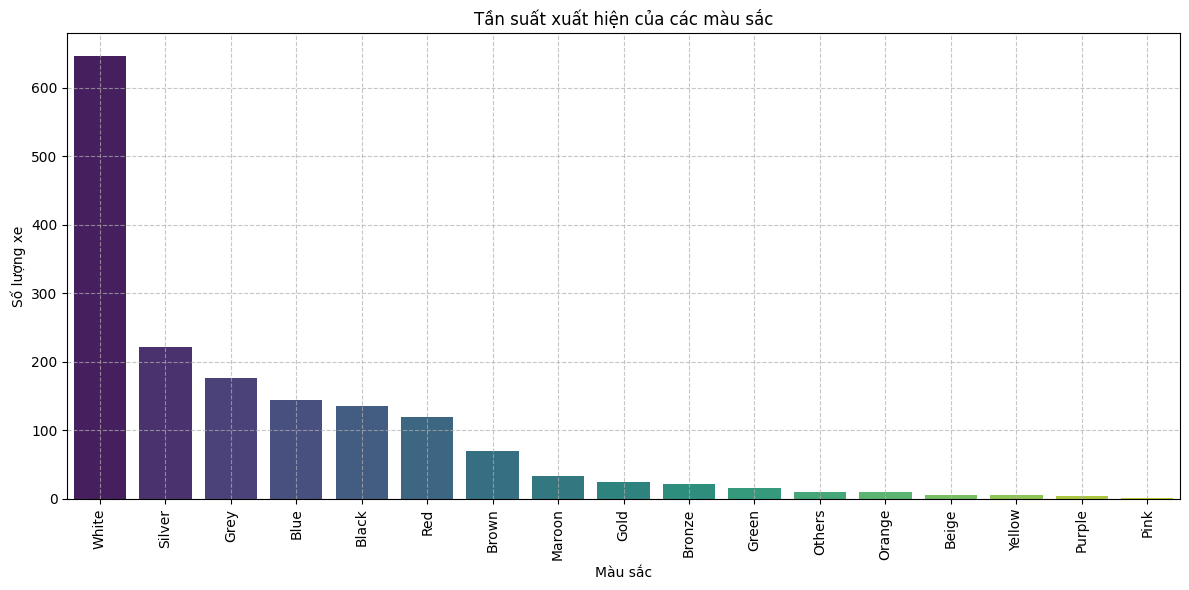

In [ ]:
# Tính giá trung bình theo màu sắc
color_price_stats = df_train.groupby('Color')['Log_Price'].agg(['mean', 'count']).reset_index()
color_price_stats = color_price_stats.rename(columns={'mean': 'mean_price', 'count': 'frequency'})
color_price_stats = color_price_stats.sort_values('frequency', ascending=False)

# Vẽ biểu đồ phân bố tần suất của các màu sắc
plt.figure(figsize=(12, 6))
sns.barplot(x='Color', y='frequency', data=color_price_stats, palette='viridis')
plt.title('Tần suất xuất hiện của các màu sắc')
plt.xlabel('Màu sắc')
plt.ylabel('Số lượng xe')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

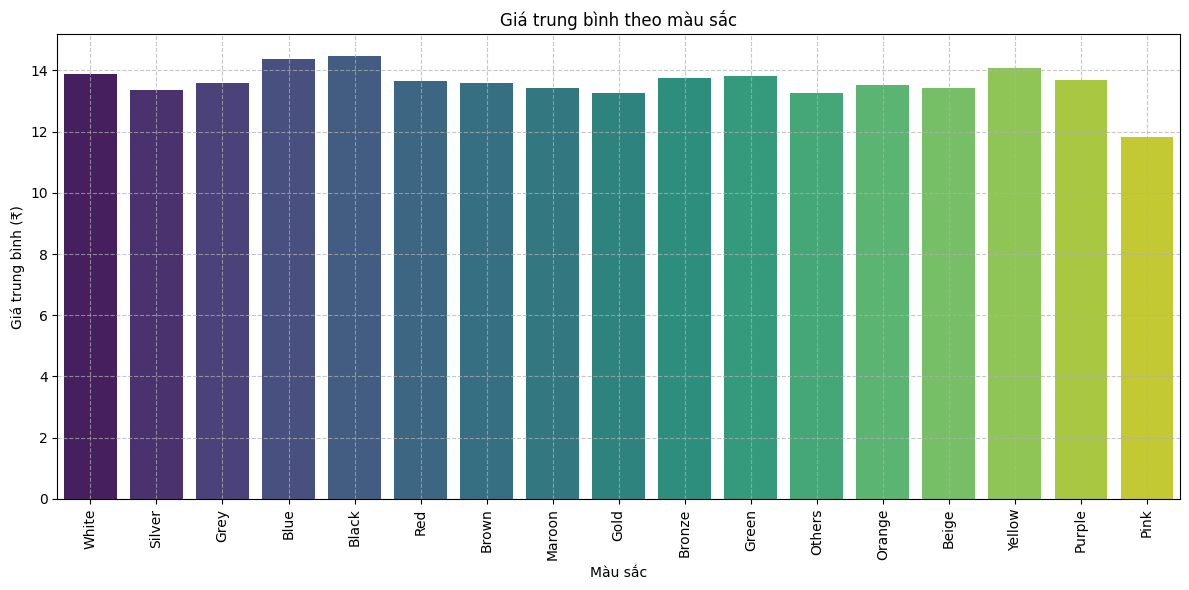

In [ ]:
# Vẽ biểu đồ giá trung bình theo màu sắc
plt.figure(figsize=(12, 6))
sns.barplot(x='Color', y='mean_price', data=color_price_stats, palette='viridis')
plt.title('Giá trung bình theo màu sắc')
plt.xlabel('Màu sắc')
plt.ylabel('Giá trung bình (₹)')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

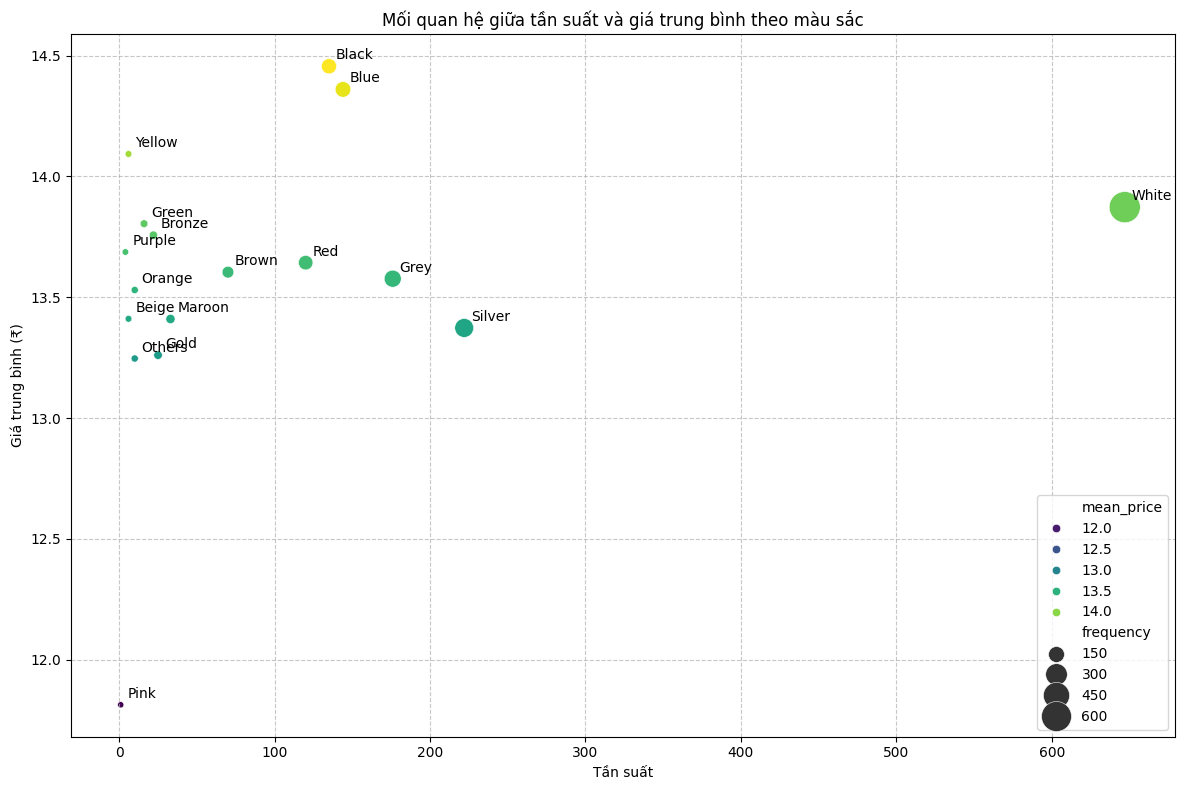

In [ ]:
# Vẽ biểu đồ kết hợp giữa tần suất và giá trung bình
plt.figure(figsize=(12, 8))
# Tạo biến màu có kích thước theo tần suất và màu theo giá trung bình
sns.scatterplot(x='frequency', y='mean_price',
                size='frequency', sizes=(20, 500),
                hue='mean_price', palette='viridis',
                data=color_price_stats)

# Thêm tên màu sắc cho mỗi điểm
for i, row in color_price_stats.iterrows():
    plt.annotate(row['Color'],
                 (row['frequency'], row['mean_price']),
                 xytext=(5, 5), textcoords='offset points')

plt.title('Mối quan hệ giữa tần suất và giá trung bình theo màu sắc')
plt.xlabel('Tần suất')
plt.ylabel('Giá trung bình (₹)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Tạo hàm để phân nhóm màu sắc theo đề xuất
def group_colors(color):
    # Premium Colors: Blue, Black (giá cao, tần suất cao)
    if color in ['Blue', 'Black']:
        return 'Premium'
    # White: giữ riêng vì là màu phổ biến nhất
    elif color == 'White':
        return 'White'
    # Standard Colors: Grey, Red (giá trung bình, tần suất cao)
    elif color in ['Grey', 'Red']:
        return 'Standard'
    # Silver: giữ riêng vì có tần suất cao nhưng giá thấp
    elif color == 'Silver':
        return 'Silver'
    # Medium Colors: Brown, Maroon, Bronze, Gold, Green (tần suất trung bình)
    elif color in ['Brown', 'Maroon', 'Bronze', 'Gold', 'Green']:
        return 'Medium'
    # Rare Colors: Beige, Yellow, Orange, Purple, Pink, Others (tần suất thấp)
    else:
        return 'Rare'

In [ ]:
df_train['Color_Group'] = df_train['Color'].apply(group_colors)

In [ ]:
# Kiểm tra phân bố của các nhóm màu mới
color_group_counts = df_train['Color_Group'].value_counts()
print("\nPhân bố của các nhóm màu sau khi phân nhóm:")
print(color_group_counts)


Phân bố của các nhóm màu sau khi phân nhóm:
Color_Group
White       647
Standard    296
Premium     279
Silver      222
Medium      166
Rare         37
Name: count, dtype: int64



Giá trung bình của các nhóm màu:
  Color_Group  mean_price  frequency
1     Premium   14.406674        279
5       White   13.872949        647
4    Standard   13.603673        296
0      Medium   13.553210        166
2        Rare   13.495887         37
3      Silver   13.372988        222


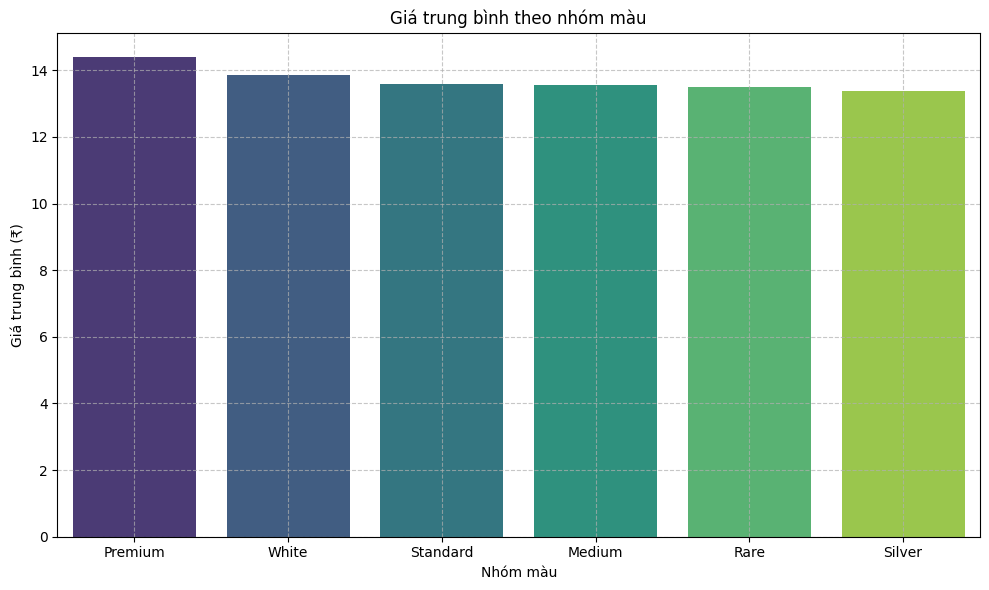

In [ ]:
# Tính giá trị trung bình của mỗi nhóm
color_group_price = df_train.groupby('Color_Group')['Log_Price'].agg(['mean', 'count']).reset_index()
color_group_price = color_group_price.rename(columns={'mean': 'mean_price', 'count': 'frequency'})
color_group_price = color_group_price.sort_values('mean_price', ascending=False)

print("\nGiá trung bình của các nhóm màu:")
print(color_group_price)

# Vẽ biểu đồ giá trung bình theo nhóm màu
plt.figure(figsize=(10, 6))
sns.barplot(x='Color_Group', y='mean_price', data=color_group_price, palette='viridis')
plt.title('Giá trung bình theo nhóm màu')
plt.xlabel('Nhóm màu')
plt.ylabel('Giá trung bình (₹)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Kiểm tra chi tiết từng nhóm
print("\nChi tiết các màu trong từng nhóm:")
for group in color_group_price['Color_Group']:
    colors_in_group = df_train[df_train['Color_Group'] == group]['Color'].unique()
    print(f"{group}: {', '.join(colors_in_group)}")


Chi tiết các màu trong từng nhóm:
Premium: Black, Blue
White: White
Standard: Grey, Red
Medium: Gold, Brown, Maroon, Bronze, Green
Rare: Orange, Others, Beige, Yellow, Purple, Pink
Silver: Silver


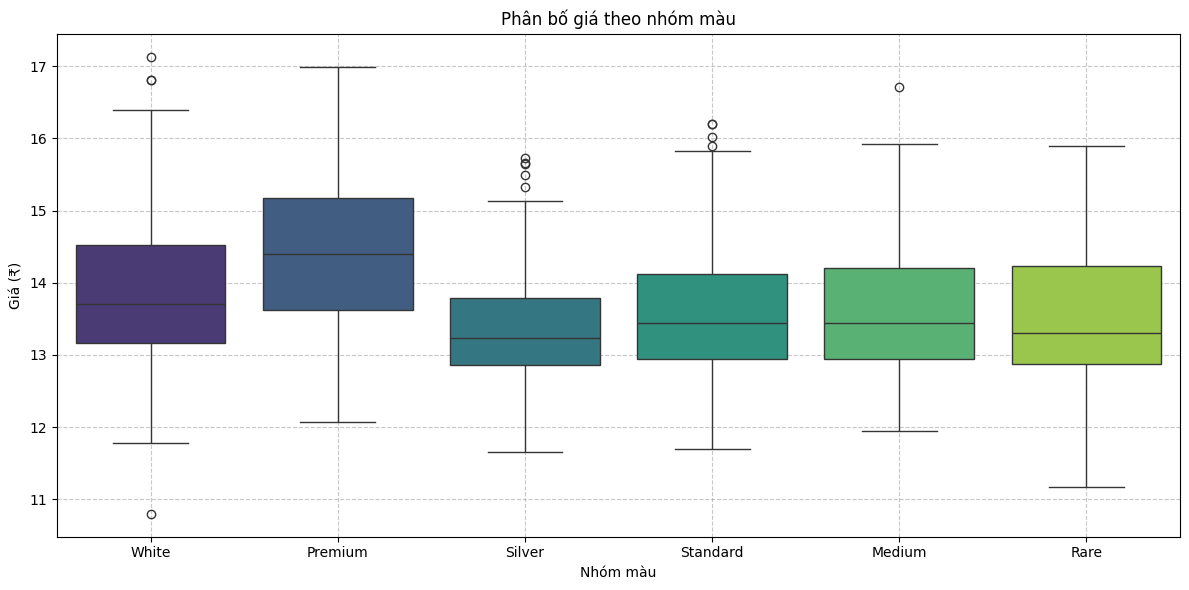

In [ ]:
# Vẽ boxplot để xem phân bố giá trong mỗi nhóm
plt.figure(figsize=(12, 6))
sns.boxplot(x='Color_Group', y='Log_Price', data=df_train, palette='viridis')
plt.title('Phân bố giá theo nhóm màu')
plt.xlabel('Nhóm màu')
plt.ylabel('Giá (₹)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
color_group_dummies = pd.get_dummies(df_train['Color_Group'], prefix='Color')
color_group_dummies

,Color_Medium,Color_Premium,Color_Rare,Color_Silver,Color_Standard,Color_White
0,False,False,False,False,False,True
1,False,True,False,False,False,False
2,False,False,False,True,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
1642,False,False,False,False,False,True
1643,False,False,False,False,True,False
1644,False,False,False,False,True,False
1645,False,True,False,False,False,False


In [ ]:
# Nối các biến one-hot vào DataFrame gốc
df_train = pd.concat([df_train, color_group_dummies], axis=1)

In [ ]:
print(df_train[['Color', 'Color_Group'] + list(color_group_dummies.columns)].head(10))

    Color Color_Group  Color_Medium  Color_Premium  Color_Rare  Color_Silver  \
0   White       White         False          False       False         False   
1   Black     Premium         False           True       False         False   
2  Silver      Silver         False          False       False          True   
3   White       White         False          False       False         False   
4   White       White         False          False       False         False   
5    Blue     Premium         False           True       False         False   
6   White       White         False          False       False         False   
7   White       White         False          False       False         False   
8   Black     Premium         False           True       False         False   
9   White       White         False          False       False         False   

   Color_Standard  Color_White  
0           False         True  
1           False        False  
2           False   

In [ ]:
correlation_with_price = pd.DataFrame({
    'Feature': color_group_dummies.columns,
    'Correlation': [df_train[col].corr(df_train['Log_Price']) for col in color_group_dummies.columns]
})
print("\nHệ số tương quan giữa các biến one-hot và giá:")
print(correlation_with_price.sort_values('Correlation', ascending=False))


Hệ số tương quan giữa các biến one-hot và giá:
          Feature  Correlation
1   Color_Premium     0.275526
5     Color_White     0.054057
2      Color_Rare    -0.047956
0    Color_Medium    -0.086387
4  Color_Standard    -0.096752
3    Color_Silver    -0.174202


In [ ]:
# Tạo dictionary mapping từ màu gốc sang nhóm
color_mapping = {
    'Blue': 'Premium',
    'Black': 'Premium',
    'White': 'White',
    'Grey': 'Standard',
    'Red': 'Standard',
    'Silver': 'Silver',
    'Brown': 'Medium',
    'Maroon': 'Medium',
    'Bronze': 'Medium',
    'Gold': 'Medium',
    'Green': 'Medium',
    'Beige': 'Rare',
    'Yellow': 'Rare',
    'Orange': 'Rare',
    'Purple': 'Rare',
    'Pink': 'Rare',
    'Others': 'Rare'
}

# Lưu mapping để sử dụng cho dữ liệu test
import pickle
with open('color_mapping.pkl', 'wb') as f:
    pickle.dump(color_mapping, f)

In [ ]:
# # Nạp mapping từ file
# with open('color_mapping.pkl', 'rb') as f:
#     color_mapping = pickle.load(f)

# # Áp dụng phân nhóm cho dữ liệu test
# df_test['Color_Group'] = df_test['Color'].map(color_mapping)
# df_test['Color_Group'] = df_test['Color_Group'].fillna('Rare')  # Xử lý màu chưa biết

# # Tạo các cột one-hot
# color_group_dummies = pd.get_dummies(df_test['Color_Group'], prefix='Color')

# # Đảm bảo có đủ cột như dữ liệu train
# expected_columns = ['Color_Premium', 'Color_White', 'Color_Standard', 'Color_Silver', 'Color_Medium', 'Color_Rare']
# for col in expected_columns:
#     if col not in color_group_dummies.columns:
#         color_group_dummies[col] = 0

# # Nối vào dataframe test
# df_test = pd.concat([df_test, color_group_dummies], axis=1)

In [ ]:
print("\nThống kê phân nhóm cuối cùng:")
group_size = df_train.groupby('Color_Group').size()
group_percentage = 100 * group_size / len(df_train)
group_summary = pd.DataFrame({
    'Count': group_size,
    'Percentage (%)': group_percentage,
    'Mean Price': df_train.groupby('Color_Group')['Log_Price'].mean()
})
print(group_summary.sort_values('Count', ascending=False))


Thống kê phân nhóm cuối cùng:
             Count  Percentage (%)  Mean Price
Color_Group                                   
White          647       39.283546   13.872949
Standard       296       17.972070   13.603673
Premium        279       16.939891   14.406674
Silver         222       13.479053   13.372988
Medium         166       10.078931   13.553210
Rare            37        2.246509   13.495887


## Xử lý trên cột Owner


**Create these ownership groups:**
- "New" (UnRegistered Car)
- "First Owner" (keep as is - largest category)
- "Second Owner" (keep as is - second largest)
- "Third Owner" (combine Third, Fourth, and "4 or More")
- "Fourth_Plus_Owner"

In [ ]:
# Xem phân bố của các loại chủ sở hữu
owner_counts = df_train['Owner'].value_counts()
print(f"Số lượng loại chủ sở hữu khác nhau: {len(owner_counts)}")
print("\nPhân bố của các loại chủ sở hữu:")
print(owner_counts)

Số lượng loại chủ sở hữu khác nhau: 6

Phân bố của các loại chủ sở hữu:
Owner
First               1300
Second               288
Third                 38
UnRegistered Car      17
Fourth                 3
4 or More              1
Name: count, dtype: int64


In [ ]:
# Tính giá trung bình theo loại chủ sở hữu
owner_price_stats = df_train.groupby('Owner')['Log_Price'].agg(['mean', 'count']).reset_index()
owner_price_stats = owner_price_stats.rename(columns={'mean': 'mean_price', 'count': 'frequency'})
owner_price_stats = owner_price_stats.sort_values('frequency', ascending=False)

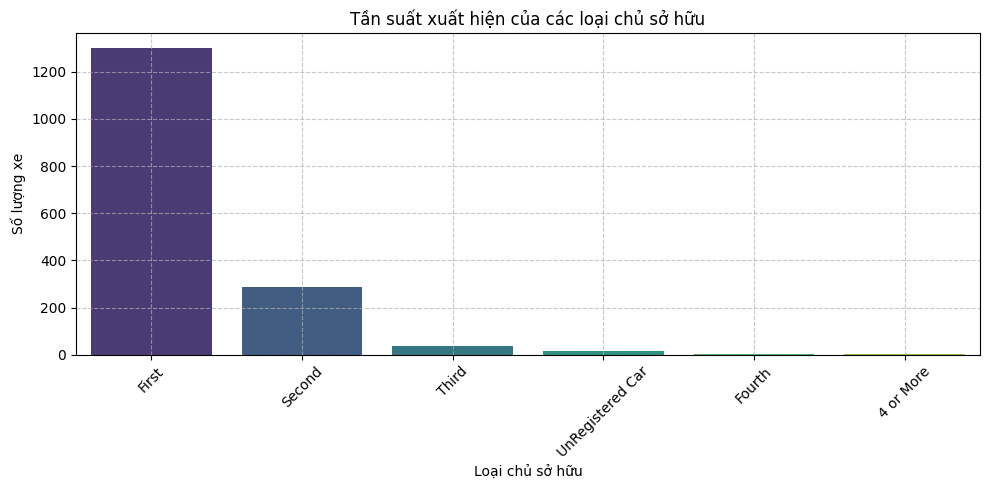

In [ ]:
# Vẽ biểu đồ phân bố tần suất của các loại chủ sở hữu
plt.figure(figsize=(10, 5))
sns.barplot(x='Owner', y='frequency', data=owner_price_stats, palette='viridis')
plt.title('Tần suất xuất hiện của các loại chủ sở hữu')
plt.xlabel('Loại chủ sở hữu')
plt.ylabel('Số lượng xe')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

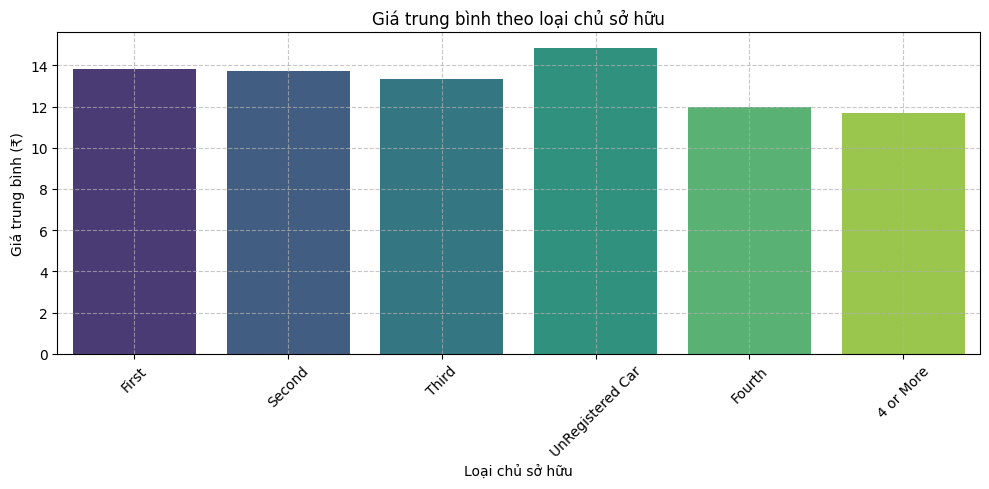

In [ ]:
# Vẽ biểu đồ giá trung bình theo loại chủ sở hữu
plt.figure(figsize=(10, 5))
sns.barplot(x='Owner', y='mean_price', data=owner_price_stats, palette='viridis')
plt.title('Giá trung bình theo loại chủ sở hữu')
plt.xlabel('Loại chủ sở hữu')
plt.ylabel('Giá trung bình (₹)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

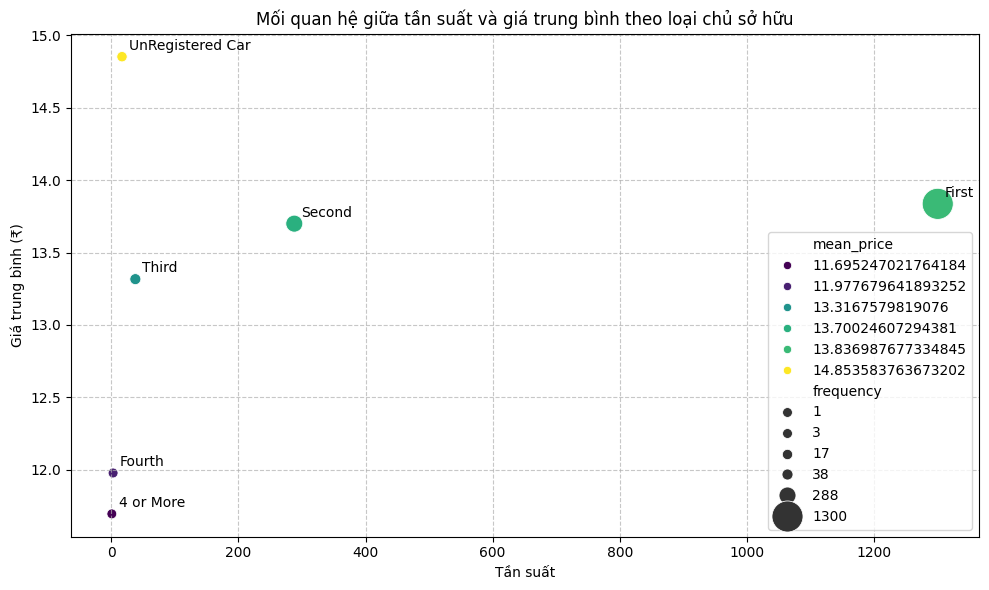

In [ ]:
# Vẽ biểu đồ kết hợp giữa tần suất và giá trung bình
plt.figure(figsize=(10, 6))
# Tạo biến kích thước theo tần suất và màu theo giá trung bình
sns.scatterplot(x='frequency', y='mean_price',
                size='frequency', sizes=(50, 500),
                hue='mean_price', palette='viridis',
                data=owner_price_stats)

# Thêm tên loại chủ sở hữu cho mỗi điểm
for i, row in owner_price_stats.iterrows():
    plt.annotate(row['Owner'],
                 (row['frequency'], row['mean_price']),
                 xytext=(5, 5), textcoords='offset points')

plt.title('Mối quan hệ giữa tần suất và giá trung bình theo loại chủ sở hữu')
plt.xlabel('Tần suất')
plt.ylabel('Giá trung bình (₹)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
def group_owners(owner):
    if owner == 'UnRegistered Car':
        return 'New'
    elif owner == 'First':
        return 'First_Owner'
    elif owner == 'Second':
        return 'Second_Owner'
    elif owner == 'Third':
        return 'Third_Owner'
    else:  # Fourth, 4 or More
        return 'Fourth_Plus_Owner'

In [ ]:
df_train['Owner_Group'] = df_train['Owner'].apply(group_owners)

In [ ]:
owner_group_counts = df_train['Owner_Group'].value_counts()
print("\nPhân bố của các nhóm chủ sở hữu sau khi phân nhóm:")
print(owner_group_counts)


Phân bố của các nhóm chủ sở hữu sau khi phân nhóm:
Owner_Group
First_Owner          1300
Second_Owner          288
Third_Owner            38
New                    17
Fourth_Plus_Owner       4
Name: count, dtype: int64


In [ ]:
# Tính giá trị trung bình của mỗi nhóm
owner_group_price = df_train.groupby('Owner_Group')['Log_Price'].agg(['mean', 'count']).reset_index()
owner_group_price = owner_group_price.rename(columns={'mean': 'mean_price', 'count': 'frequency'})
owner_group_price = owner_group_price.sort_values('mean_price', ascending=False)

print("\nGiá trung bình của các nhóm chủ sở hữu:")
print(owner_group_price)


Giá trung bình của các nhóm chủ sở hữu:
         Owner_Group  mean_price  frequency
2                New   14.853584         17
0        First_Owner   13.836988       1300
3       Second_Owner   13.700246        288
4        Third_Owner   13.316758         38
1  Fourth_Plus_Owner   11.907071          4


In [ ]:
# Tính giá trị trung bình của mỗi nhóm
owner_group_price = df_train.groupby('Owner_Group')['Log_Price'].agg(['mean', 'count']).reset_index()
owner_group_price = owner_group_price.rename(columns={'mean': 'mean_price', 'count': 'frequency'})
owner_group_price = owner_group_price.sort_values('mean_price', ascending=False)

print("\nGiá trung bình của các nhóm chủ sở hữu:")
print(owner_group_price)


Giá trung bình của các nhóm chủ sở hữu:
         Owner_Group  mean_price  frequency
2                New   14.853584         17
0        First_Owner   13.836988       1300
3       Second_Owner   13.700246        288
4        Third_Owner   13.316758         38
1  Fourth_Plus_Owner   11.907071          4


In [ ]:
# Kiểm tra chi tiết từng nhóm
print("\nChi tiết các loại chủ sở hữu trong từng nhóm:")
for group in owner_group_price['Owner_Group']:
    owners_in_group = df_train[df_train['Owner_Group'] == group]['Owner'].unique()
    print(f"{group}: {', '.join(owners_in_group)}")


Chi tiết các loại chủ sở hữu trong từng nhóm:
New: UnRegistered Car
First_Owner: First
Second_Owner: Second
Third_Owner: Third
Fourth_Plus_Owner: 4 or More, Fourth


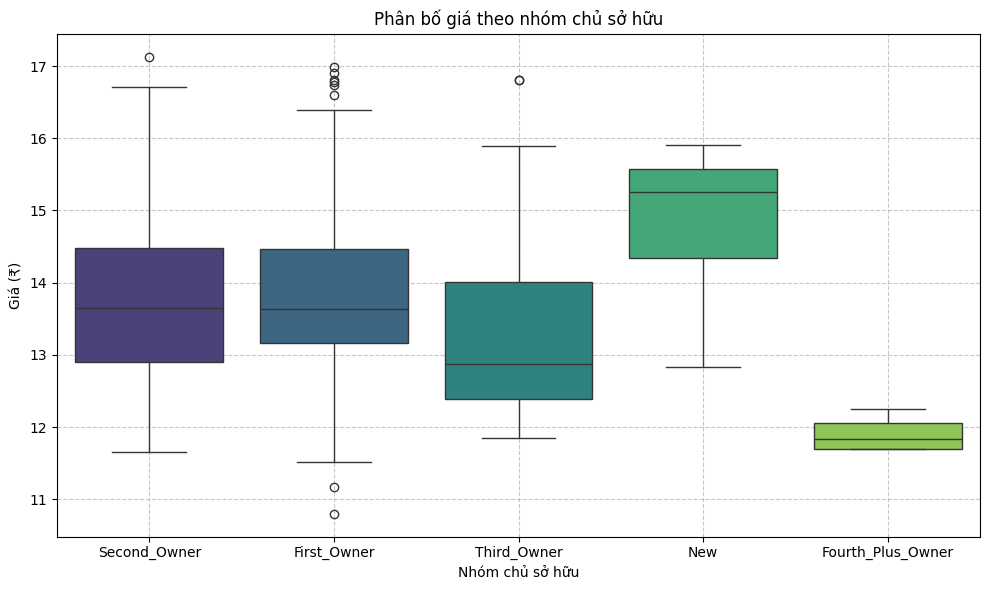

In [ ]:
# Vẽ boxplot để xem phân bố giá trong mỗi nhóm
plt.figure(figsize=(10, 6))
sns.boxplot(x='Owner_Group', y='Log_Price', data=df_train, palette='viridis')
plt.title('Phân bố giá theo nhóm chủ sở hữu')
plt.xlabel('Nhóm chủ sở hữu')
plt.ylabel('Giá (₹)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
owner_group_dummies = pd.get_dummies(df_train['Owner_Group'], prefix='Owner')
owner_group_dummies

,Owner_First_Owner,Owner_Fourth_Plus_Owner,Owner_New,Owner_Second_Owner,Owner_Third_Owner
0,False,False,False,True,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
1642,False,False,False,True,False
1643,True,False,False,False,False
1644,True,False,False,False,False
1645,True,False,False,False,False


In [ ]:
df_train = pd.concat([df_train, owner_group_dummies], axis=1)

In [ ]:
print(df_train[['Owner', 'Owner_Group'] + list(owner_group_dummies.columns)].head(10))


    Owner   Owner_Group  Owner_First_Owner  Owner_Fourth_Plus_Owner  \
0  Second  Second_Owner              False                    False   
1   First   First_Owner               True                    False   
2   First   First_Owner               True                    False   
3   First   First_Owner               True                    False   
4   First   First_Owner               True                    False   
5  Second  Second_Owner              False                    False   
6   Third   Third_Owner              False                    False   
7   First   First_Owner               True                    False   
8   First   First_Owner               True                    False   
9   First   First_Owner               True                    False   

   Owner_New  Owner_Second_Owner  Owner_Third_Owner  
0      False                True              False  
1      False               False              False  
2      False               False              False  
3 


Hệ số tương quan giữa các biến one-hot và giá:
                   Feature  Correlation
2                Owner_New     0.108732
0        Owner_First_Owner     0.059278
3       Owner_Second_Owner    -0.049932
4        Owner_Third_Owner    -0.076616
1  Owner_Fourth_Plus_Owner    -0.095350


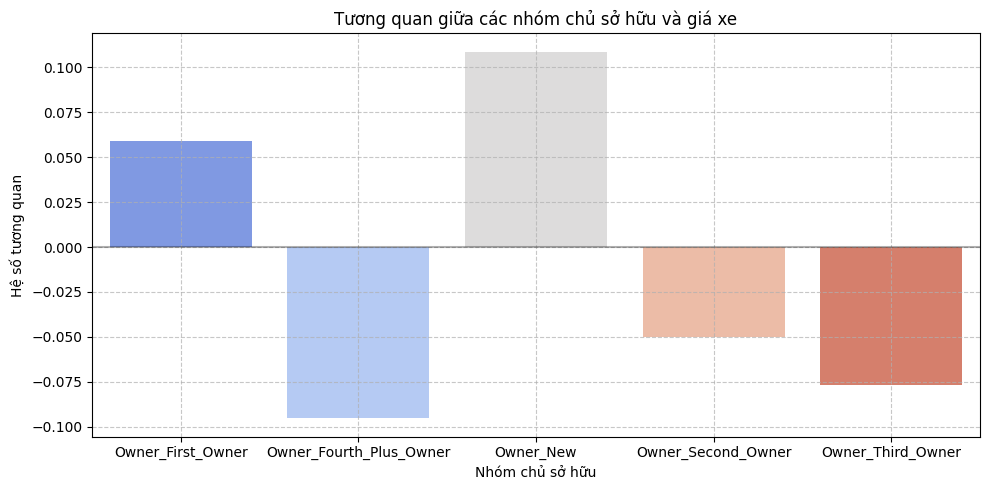

In [ ]:
# Tính hệ số tương quan giữa các biến one-hot và giá
correlation_with_price = pd.DataFrame({
    'Feature': owner_group_dummies.columns,
    'Correlation': [df_train[col].corr(df_train['Log_Price']) for col in owner_group_dummies.columns]
})

print("\nHệ số tương quan giữa các biến one-hot và giá:")
print(correlation_with_price.sort_values('Correlation', ascending=False))

# Vẽ biểu đồ tương quan
plt.figure(figsize=(10, 5))
sns.barplot(x='Feature', y='Correlation', data=correlation_with_price, palette='coolwarm')
plt.title('Tương quan giữa các nhóm chủ sở hữu và giá xe')
plt.xlabel('Nhóm chủ sở hữu')
plt.ylabel('Hệ số tương quan')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
owner_mapping = {
    'UnRegistered Car': 'New',
    'First': 'First_Owner',
    'Second': 'Second_Owner',
    'Third': 'Third_Owner',
    'Fourth': 'Fourth_Plus_Owner',
    '4 or More': 'Fourth_Plus_Owner'
}

# Lưu mapping để sử dụng cho dữ liệu test
import pickle
with open('owner_mapping.pkl', 'wb') as f:
    pickle.dump(owner_mapping, f)

## Xử lý trên cột `Seller Type`

In [ ]:
# Xem phân bố của các loại người bán
seller_counts = df_train['Seller Type'].value_counts()
print(f"Số lượng loại người bán khác nhau: {len(seller_counts)}")
print("\nPhân bố của các loại người bán:")
print(seller_counts)
print("\nPhân bố phần trăm:")
print(100 * seller_counts / len(df_train))

Số lượng loại người bán khác nhau: 3

Phân bố của các loại người bán:
Seller Type
Individual                 1595
Corporate                    47
Commercial Registration       5
Name: count, dtype: int64

Phân bố phần trăm:
Seller Type
Individual                 96.842744
Corporate                   2.853673
Commercial Registration     0.303582
Name: count, dtype: float64


In [ ]:
# Tính giá trung bình theo loại người bán
seller_price_stats = df_train.groupby('Seller Type')['Log_Price'].agg(['mean', 'count']).reset_index()
seller_price_stats = seller_price_stats.rename(columns={'mean': 'mean_price', 'count': 'frequency'})
seller_price_stats = seller_price_stats.sort_values('mean_price', ascending=False)

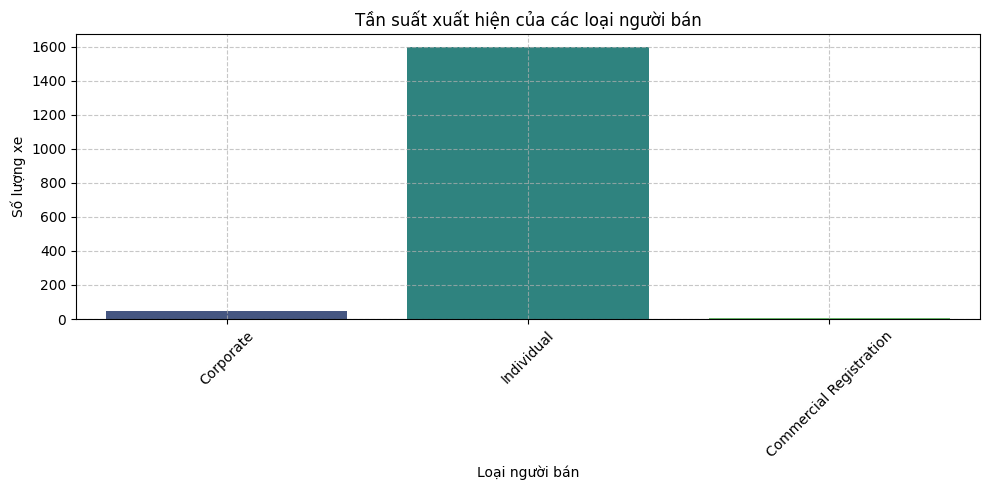

In [ ]:
# Vẽ biểu đồ phân bố tần suất của các loại người bán
plt.figure(figsize=(10, 5))
sns.barplot(x='Seller Type', y='frequency', data=seller_price_stats, palette='viridis')
plt.title('Tần suất xuất hiện của các loại người bán')
plt.xlabel('Loại người bán')
plt.ylabel('Số lượng xe')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

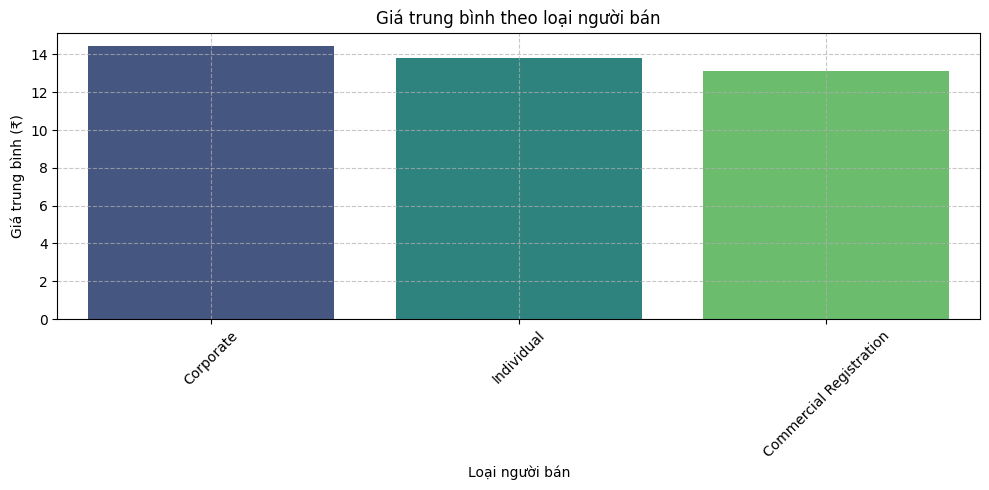

In [ ]:
# Vẽ biểu đồ giá trung bình theo loại người bán
plt.figure(figsize=(10, 5))
sns.barplot(x='Seller Type', y='mean_price', data=seller_price_stats, palette='viridis')
plt.title('Giá trung bình theo loại người bán')
plt.xlabel('Loại người bán')
plt.ylabel('Giá trung bình (₹)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

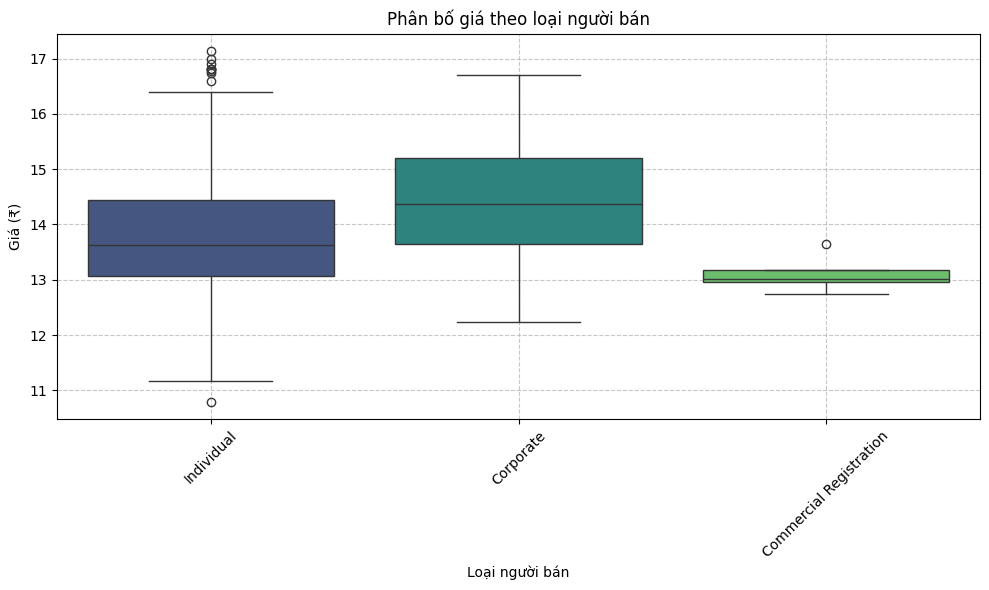

In [ ]:
# Vẽ boxplot để xem phân bố giá trong mỗi loại người bán
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seller Type', y='Log_Price', data=df_train, palette='viridis')
plt.title('Phân bố giá theo loại người bán')
plt.xlabel('Loại người bán')
plt.ylabel('Giá (₹)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
seller_type_dummies = pd.get_dummies(df_train['Seller Type'], prefix='Seller')
seller_type_dummies

,Seller_Commercial Registration,Seller_Corporate,Seller_Individual
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
1642,False,False,True
1643,False,False,True
1644,False,False,True
1645,False,False,True


In [ ]:
df_train = pd.concat([df_train, seller_type_dummies], axis=1)

In [ ]:
print("\nDữ liệu sau khi thêm các cột one-hot:")
columns_to_show = ['Seller Type'] + list(seller_type_dummies.columns)
print(df_train[columns_to_show].head(10))


Dữ liệu sau khi thêm các cột one-hot:
  Seller Type  Seller_Commercial Registration  Seller_Corporate  \
0  Individual                           False             False   
1  Individual                           False             False   
2  Individual                           False             False   
3  Individual                           False             False   
4  Individual                           False             False   
5  Individual                           False             False   
6  Individual                           False             False   
7  Individual                           False             False   
8  Individual                           False             False   
9  Individual                           False             False   

   Seller_Individual  
0               True  
1               True  
2               True  
3               True  
4               True  
5               True  
6               True  
7               True  
8               

In [ ]:
# Tính hệ số tương quan giữa các biến one-hot và giá
correlation_with_price = pd.DataFrame({
    'Feature': seller_type_dummies.columns,
    'Correlation': [df_train[col].corr(df_train['Log_Price']) for col in seller_type_dummies.columns]
})


Hệ số tương quan giữa các biến one-hot và giá:
                          Feature  Correlation
1                Seller_Corporate     0.107483
0  Seller_Commercial Registration    -0.039148
2               Seller_Individual    -0.090028


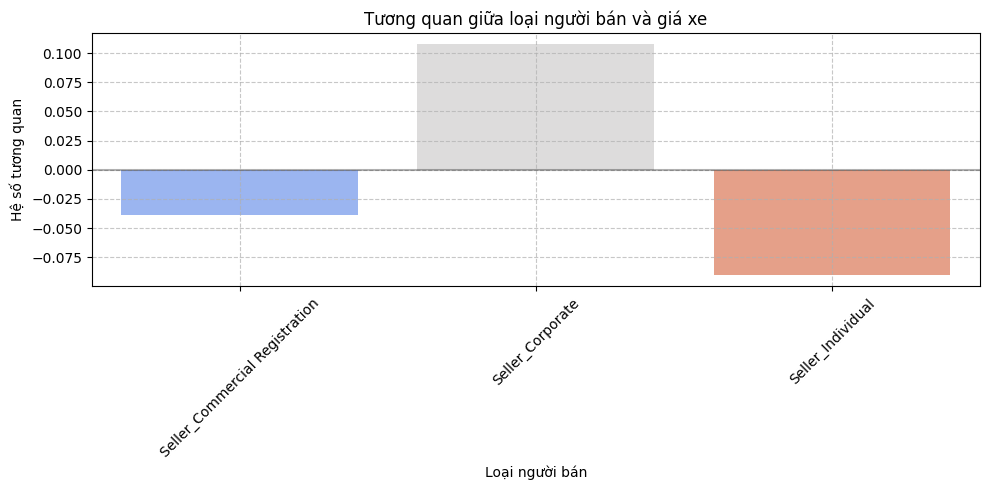

In [ ]:
print("\nHệ số tương quan giữa các biến one-hot và giá:")
print(correlation_with_price.sort_values('Correlation', ascending=False))

# Vẽ biểu đồ tương quan
plt.figure(figsize=(10, 5))
sns.barplot(x='Feature', y='Correlation', data=correlation_with_price, palette='coolwarm')
plt.title('Tương quan giữa loại người bán và giá xe')
plt.xlabel('Loại người bán')
plt.ylabel('Hệ số tương quan')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_train.columns

Index(['Make', 'Year', 'Kilometer', 'Color', 'Owner', 'Seller Type',
       'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Max_Power_Value', 'Max_Power_RPM',
       'Max_Torque_Value', 'Max_Torque_RPM', 'Engine_Value',
       'Kilometer_Processed', 'Log_Price', 'Make_encoded', 'Fuel_CNG',
       'Fuel_Diesel', 'Fuel_Others', 'Fuel_Petrol',
       'Transmission_is_Automatic', 'Color_Group', 'Color_Medium',
       'Color_Premium', 'Color_Rare', 'Color_Silver', 'Color_Standard',
       'Color_White', 'Owner_Group', 'Owner_First_Owner',
       'Owner_Fourth_Plus_Owner', 'Owner_New', 'Owner_Second_Owner',
       'Owner_Third_Owner', 'Seller_Commercial Registration',
       'Seller_Corporate', 'Seller_Individual'],
      dtype='object')

In [ ]:
df_train.drop("Seller_Individual", axis=1, inplace=True)

In [ ]:
# Phần 4: Xử lý multicollinearity
print("\nLưu ý về multicollinearity:")
print("Khi sử dụng 3 biến dummy cho 3 loại người bán, chúng ta cần loại bỏ một biến để tránh")
print("multicollinearity hoàn hảo (dummy variable trap). Thông thường, chúng ta loại bỏ biến có")
print("tần suất cao nhất, trong trường hợp này là 'Seller_Individual'.")
print("Tuy nhiên, bạn cũng có thể loại bỏ biến có tương quan thấp nhất với giá để giữ lại những biến")
print("có ảnh hưởng lớn hơn đến biến mục tiêu.")


Lưu ý về multicollinearity:
Khi sử dụng 3 biến dummy cho 3 loại người bán, chúng ta cần loại bỏ một biến để tránh
multicollinearity hoàn hảo (dummy variable trap). Thông thường, chúng ta loại bỏ biến có
tần suất cao nhất, trong trường hợp này là 'Seller_Individual'.
Tuy nhiên, bạn cũng có thể loại bỏ biến có tương quan thấp nhất với giá để giữ lại những biến
có ảnh hưởng lớn hơn đến biến mục tiêu.


In [ ]:
import pickle

# Lưu danh sách các cột one-hot đã tạo
seller_type_columns = list(seller_type_dummies.columns)
with open('seller_type_encoding.pkl', 'wb') as f:
    pickle.dump(seller_type_columns, f)

In [ ]:
# # Nạp thông tin encoding từ file
# with open('seller_type_encoding.pkl', 'rb') as f:
#     seller_type_columns = pickle.load(f)

# # Tạo các cột one-hot cho dữ liệu test
# test_seller_type_dummies = pd.get_dummies(df_test['Seller Type'], prefix='Seller')

# # Đảm bảo có đủ các cột như dữ liệu train
# for col in seller_type_columns:
#     if col not in test_seller_type_dummies.columns:
#         test_seller_type_dummies[col] = 0

# # Chỉ lấy các cột đã được sử dụng trong train
# test_seller_type_dummies = test_seller_type_dummies[seller_type_columns]

# # Nối vào dataframe test
# df_test = pd.concat([df_test, test_seller_type_dummies], axis=1)

# # Nếu có áp dụng kỹ thuật loại bỏ multicollinearity, hãy đảm bảo cùng loại bỏ cột đó ở dữ liệu test
# # df_test = df_test.drop('Seller_Individual', axis=1)  # Bỏ comment nếu đã loại bỏ ở dữ liệu train


In [ ]:
print("\nThống kê cuối cùng:")
seller_stats = pd.DataFrame({
    'Count': seller_counts,
    'Percentage (%)': 100 * seller_counts / len(df_train),
    'Mean Price': df_train.groupby('Seller Type')['Log_Price'].mean()
})
print(seller_stats)


Thống kê cuối cùng:
                         Count  Percentage (%)  Mean Price
Seller Type                                               
Commercial Registration      5        0.303582   13.109434
Corporate                   47        2.853673   14.423401
Individual                1595       96.842744   13.790899


## Xử lý cột `Seating Capacity`

In [ ]:
col = "Seating Capacity"
unique_values = df_train[col].unique()
value_counts = df_train[col].value_counts()

print(f"\n--- Unique Values and Frequencies for column '{col}' ---")
print("Unique Values:")
print(unique_values)
print("\nFrequencies:")
print(value_counts)
print("\nPercentage")
print(value_counts / len(df_train) * 100)


--- Unique Values and Frequencies for column 'Seating Capacity' ---
Unique Values:
[5 7 2 6 8 4]

Frequencies:
Seating Capacity
5    1343
7     221
4      34
8      27
6      18
2       4
Name: count, dtype: int64

Percentage
Seating Capacity
5    81.542198
7    13.418336
4     2.064359
8     1.639344
6     1.092896
2     0.242866
Name: count, dtype: float64



--- Summary Table for 'Seating Capacity' ---
                  Unique Value  Mean Price  Frequency
Seating Capacity                                     
2                            2   15.772655          4
4                            4   14.864952         34
5                            5   13.695334       1343
6                            6   14.407868         18
7                            7   14.261610        221
8                            8   13.608913         27


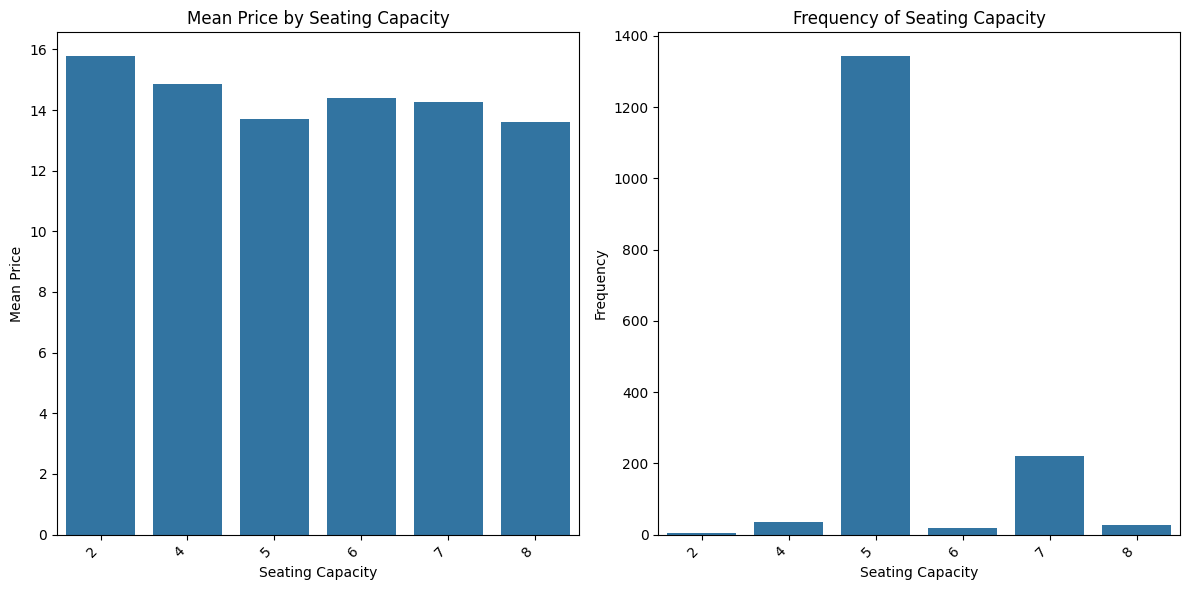

In [ ]:
# Calculate mean Price for each category
mean_price_by_category = df_train.groupby(col)['Log_Price'].mean()

# Create a table with unique values, frequencies, and mean prices
summary_table = pd.DataFrame({
    'Unique Value': mean_price_by_category.index,
    'Mean Price': mean_price_by_category.values,
    'Frequency': df_train[col].value_counts().sort_index()  # Ensure correct alignment
})

# Display the table
print(f"\n--- Summary Table for '{col}' ---")
print(summary_table)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=summary_table['Unique Value'], y=summary_table['Mean Price'])
plt.xticks(rotation=45, ha='right')
plt.title(f'Mean Price by {col}')
plt.xlabel(col)
plt.ylabel('Mean Price')

plt.subplot(1, 2, 2)
sns.barplot(x=summary_table['Unique Value'], y=summary_table['Frequency'])
plt.xticks(rotation=45, ha='right')
plt.title(f'Frequency of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: Code để tách `Seating Capacity` thành 6 cột mới (one-hot encoding) sau đó drop cột có liên quan đến value  trong `Seating Capacity`

# One-hot encode 'Seating Capacity'
seating_capacity_dummies = pd.get_dummies(df_train['Seating Capacity'], prefix='Seating')
df_train = pd.concat([df_train, seating_capacity_dummies], axis=1)

# Drop the original 'Seating Capacity' column
df_train.drop('Seating Capacity', axis=1, inplace=True)
df_train

,Make,Year,Kilometer,Color,Owner,Seller Type,Drivetrain,Length,Width,Height,...,Owner_Second_Owner,Owner_Third_Owner,Seller_Commercial Registration,Seller_Corporate,Seating_2,Seating_4,Seating_5,Seating_6,Seating_7,Seating_8
0,BMW,2012,75576,White,Second,Individual,NaN,4370.0,1775.0,1550.0,...,True,False,False,False,False,False,True,False,False,False
1,BMW,2016,77000,Black,First,Individual,RWD,4454.0,2035.0,1545.0,...,False,False,False,False,False,False,True,False,False,False
2,Mahindra,2017,112000,Silver,First,Individual,FWD,4585.0,1890.0,1785.0,...,False,False,False,False,False,False,False,False,True,False
3,Mercedes-Benz,2021,3000,White,First,Individual,AWD,5207.0,2035.0,1823.0,...,False,False,False,False,False,False,False,False,True,False
4,Toyota,2019,73000,White,First,Individual,RWD,4795.0,1855.0,1835.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,Maruti Suzuki,2016,92000,White,Second,Individual,FWD,4490.0,1730.0,1485.0,...,True,False,False,False,False,False,True,False,False,False
1643,Honda,2014,9212,Grey,First,Individual,NaN,4370.0,1775.0,1550.0,...,False,False,False,False,False,False,True,False,False,False
1644,Maruti Suzuki,2017,16800,Grey,First,Individual,FWD,3545.0,1491.0,1475.0,...,False,False,False,False,False,False,True,False,False,False
1645,BMW,2014,68000,Blue,First,Individual,RWD,4899.0,2035.0,1464.0,...,False,False,False,False,False,False,True,False,False,False


## Lưu lại data sau khi xử lý Categorical Columns

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Make                            1647 non-null   object 
 1   Year                            1647 non-null   int64  
 2   Kilometer                       1647 non-null   int64  
 3   Color                           1647 non-null   object 
 4   Owner                           1647 non-null   object 
 5   Seller Type                     1647 non-null   object 
 6   Drivetrain                      1536 non-null   object 
 7   Length                          1647 non-null   float64
 8   Width                           1647 non-null   float64
 9   Height                          1647 non-null   float64
 10  Fuel Tank Capacity              1647 non-null   float64
 11  Max_Power_Value                 1647 non-null   float64
 12  Max_Power_RPM                   16

In [ ]:
df_train.drop([
    "Make", "Year", "Color", "Owner", "Seller Type", "Drivetrain"
], axis=1, inplace=True)

In [ ]:
for col in df_train.columns:
    if df_train[col].dtype == 'bool':
        df_train[col] = df_train[col].astype(int)

In [ ]:
df_train.to_csv("final_train.csv", index=False)

# Non-Linearity Data (Enhance)